<h1>Fraud Detection in Payment Card Detection</h1>

<h3>Introduction</h3> Financial fraud in payment card transactions is a growing concern in the digital economy. As online and mobile payments continue to rise, fraud detection becomes increasingly complex due to cybercriminals' evolving tactics. Traditional rule-based fraud detection methods struggle to keep up, resulting in high false positives and false negatives, which cause inconvenience to customers and financial losses to businesses.
<h3>Background</h3> The IEEE Computational Intelligence Society (IEEE-CIS), in collaboration with Vesta Corporation, has introduced a large-scale dataset to benchmark machine learning models for fraud detection. This dataset, sourced from real-world e-commerce transactions, includes a variety of features such as transaction details, device type, and product attributes. By leveraging machine learning, researchers aim to develop models that enhance fraud detection accuracy while minimizing false positives, thereby improving customer experience and reducing financial losses (IEEE-CIS, 2019).

<h3>Dataset Overview</h3> We are provided with 4 datasets: test_transaction, test_identity, train_transaction and train_identity. The data is broken into two files identity and transaction. 

1. Transaction Data Contains information on payment transactions, including timestamps, transaction amounts, and payment methods.
2. Identity Data: Includes details related to the user’s identity, such as IP address, device type, and behavioral patterns.

For this project, we will not be utlizing the test identity and test transactions since it has 500k+ columns and 400+ rows with new columns that are not present on the train identity and train transaction. 

Both datasets are linked through a common identifier, TransactionID, allowing for comprehensive analysis of transaction behaviors and fraud patterns. Not all transactions have corresponding identity information. The dataset includes labeled transactions, where the isFraud variable indicates whether a transaction is fraudulent or legitimate (IEEE-CIS, 2019).

<h3>Reference</h3>
Addison Howard, Bernadette Bouchon-Meunier, IEEE CIS, inversion, John Lei, Lynn@Vesta, Marcus2010, and Prof. Hussein Abbass. IEEE-CIS Fraud Detection. https://kaggle.com/competitions/ieee-fraud-detection, 2019. Kaggle. 


<h3>Problem Statement and Motivation</h3>

Traditional rule-based fraud detection systems rely on fixed patterns and fail to adapt to the dynamic nature of modern fraud. These static methods often miss evolving attack strategies, necessitating a shift toward data-driven approaches. Machine learning offers adaptive and scalable solutions that can detect hidden fraud patterns and respond to evolving threats more effectively.
This study focuses on using supervised machine learning techniques to identify fraudulent transactions in a real-world dataset (IEEE-CIS) with high dimensionality and class imbalance. We explore multiple modeling and sampling strategies to improve fraud detection performance.


<h4>Data Loading</h4>

Now, starting by loading the test transaction and by doing the basic data exploration such as head of the dataset (to get the top records), shape of the dataset (to get the numbers of observation and variables), info of the dataset (to learn info about the data and datatypes of each attribute) and summary of the dataset (using describe method to see the numerical values).

<h4>Importing Library</h4>

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h4>Dataset Description: Transaction Table</h4> 

- TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
- TransactionAMT: transaction payment amount in USD
- ProductCD: product code, the product for each transaction
- card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
- addr: address (both addresses are for purchaser addr1 as billing region & addr2 as billing country)
- dist: distance (distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc)
- P_ and (R__) emaildomain: purchaser and recipient email domain
- C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
- D1-D15: timedelta, such as days between previous transaction, etc.
- M1-M9: match, such as names on card and address, etc.
- Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

Categorical Features:
- ProductCD
- card1 - card6
- addr1, addr2
- P_emaildomain
- R_emaildomain
- M1 - M9


<h4>Identity Table:</h4>
Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

Categorical Features:
- DeviceType: Desktop, mobile
- DeviceInfo: iOS Device, Windows, Samsung, MacOS
- id_12 - id_38

Data exploration on train transaction dataset

In [4]:
train_transaction = pd.read_csv("/Users/nbakhati/Library/CloudStorage/OneDrive-UniversityofNebraskaatOmaha/Fraud Detection/train_transaction.csv")

In [14]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
train_transaction.shape

(590540, 394)

In [16]:
train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [17]:
train_transaction.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


Observation: As we can see above, we have new feature in train transaction dataset as denoted by the binary target 'isFraud', which we are predicting in this competetion. The probability that an online transaction is fradulent. 

Data exploration on train identity dataset

In [5]:
train_identity = pd.read_csv("/Users/nbakhati/Library/CloudStorage/OneDrive-UniversityofNebraskaatOmaha/Fraud Detection/train_identity.csv")

In [19]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [20]:
train_identity.shape

(144233, 41)

In [21]:
train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [22]:
train_identity.describe()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,1.442330e+05,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.236329e+06,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.788496e+05,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987004e+06,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.077142e+06,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.198818e+06,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.392923e+06,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577534e+06,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


Checking for missing Values

In [25]:
train_transaction.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

In [26]:
train_identity.isnull().sum()

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64

Observation: Some observations based on the missing columns counts above, we noticed that some of the columns have similar number of missing numbers such as id_37 and id_38 has 3248 missing values. Other dataset also has similar cases.
Transactions such as ID, DT, amount and type of product is complete. 

We have transactionID column on each dataset. So, we will be using it to merge train transaction with train identity. But not all transactions have corresponding identity information.

In [6]:
train = train_transaction.merge(train_identity, on="TransactionID", how= "left")

In [3]:
train=pd.read_csv('/Users/nbakhati/Library/CloudStorage/OneDrive-UniversityofNebraskaatOmaha/Fraud Detection/Code/train_id&T.csv')

In [8]:
train.shape

(590540, 434)

In [29]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [7]:
# Delete original datasets to free memory
del train_transaction, test_transaction, train_identity, test_identity
import gc
gc.collect()

0

Grouping columns based on similar total counts of missing values.

In [30]:
import numpy as np

# Replace placeholders with NaN (if any)
train.replace(["", " ", -999, "?"], np.nan, inplace=True)

# creating a dataframe to check any NaN values
nans_df = train.isna()
nans_groups = {} #dictionary to group columns by Nan counts

for col in train.columns:
    nan_count = nans_df[col].sum()
    if nan_count not in nans_groups:
        nans_groups[nan_count] = []
    nans_groups[nan_count].append(col)

# Display NaN groups
for count, cols in sorted(nans_groups.items()):
    print(f"# NAN count = {count}")
    print(cols)


# NAN count = 0
['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']
# NAN count = 12
['V279', 'V280', 'V284', 'V285', 'V286', 'V287', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V297', 'V298', 'V299', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321']
# NAN count = 314
['V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137']
# NAN count = 1269
['D1', 'V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301', 'V313', 'V314', 'V315']
# NAN count = 1565
['card3']
# NAN count = 1571
['card6']
# NAN

Observation: Based on the output above, we can tell which columns are related by the number of NANs present. One example, D1 is the subset of 'V281 to V315'. To further check we can see the correlation plot for high correlation column. 

In [31]:
#we will use NaN=0 for the below columns
selected_columns = ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 
                    'ProductCD', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 
                    'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']

df_corr = train[selected_columns]

from sklearn.preprocessing import LabelEncoder

# ProductCD is a categorical so we have to convert that categorical columns
if 'ProductCD' in df_corr.columns:
    le = LabelEncoder()
    df_corr['ProductCD'] = le.fit_transform(df_corr['ProductCD'])

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Display top correlated features with 'isFraud'
print(corr_matrix['isFraud'].sort_values(ascending=False))


/var/folders/hc/h8vmkcps571_4k1v0_h55fsw0000gn/T/ipykernel_24257/4261156757.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['ProductCD'] = le.fit_transform(df_corr['ProductCD'])


isFraud           1.000000
C2                0.037229
C8                0.032139
C12               0.031905
C1                0.030570
C4                0.030382
C10               0.028396
C7                0.028160
C11               0.027484
C6                0.020909
TransactionID     0.014166
TransactionDT     0.013103
TransactionAmt    0.011320
C14               0.007921
C3               -0.006833
C13              -0.011146
card1            -0.013640
C5               -0.030754
C9               -0.031703
ProductCD        -0.156556
Name: isFraud, dtype: float64


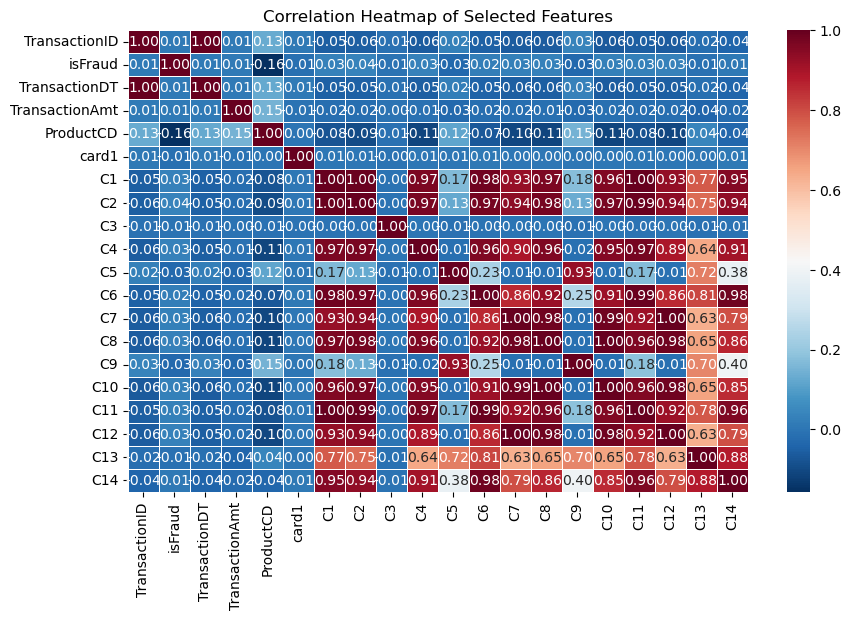

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

In [30]:
# Count columns that start with "V"
v_columns = [col for col in train.columns if col.startswith('V')]
num_v_columns = len(v_columns)

print(f"Number of columns that start with 'V': {num_v_columns}")


Number of columns that start with 'V': 339


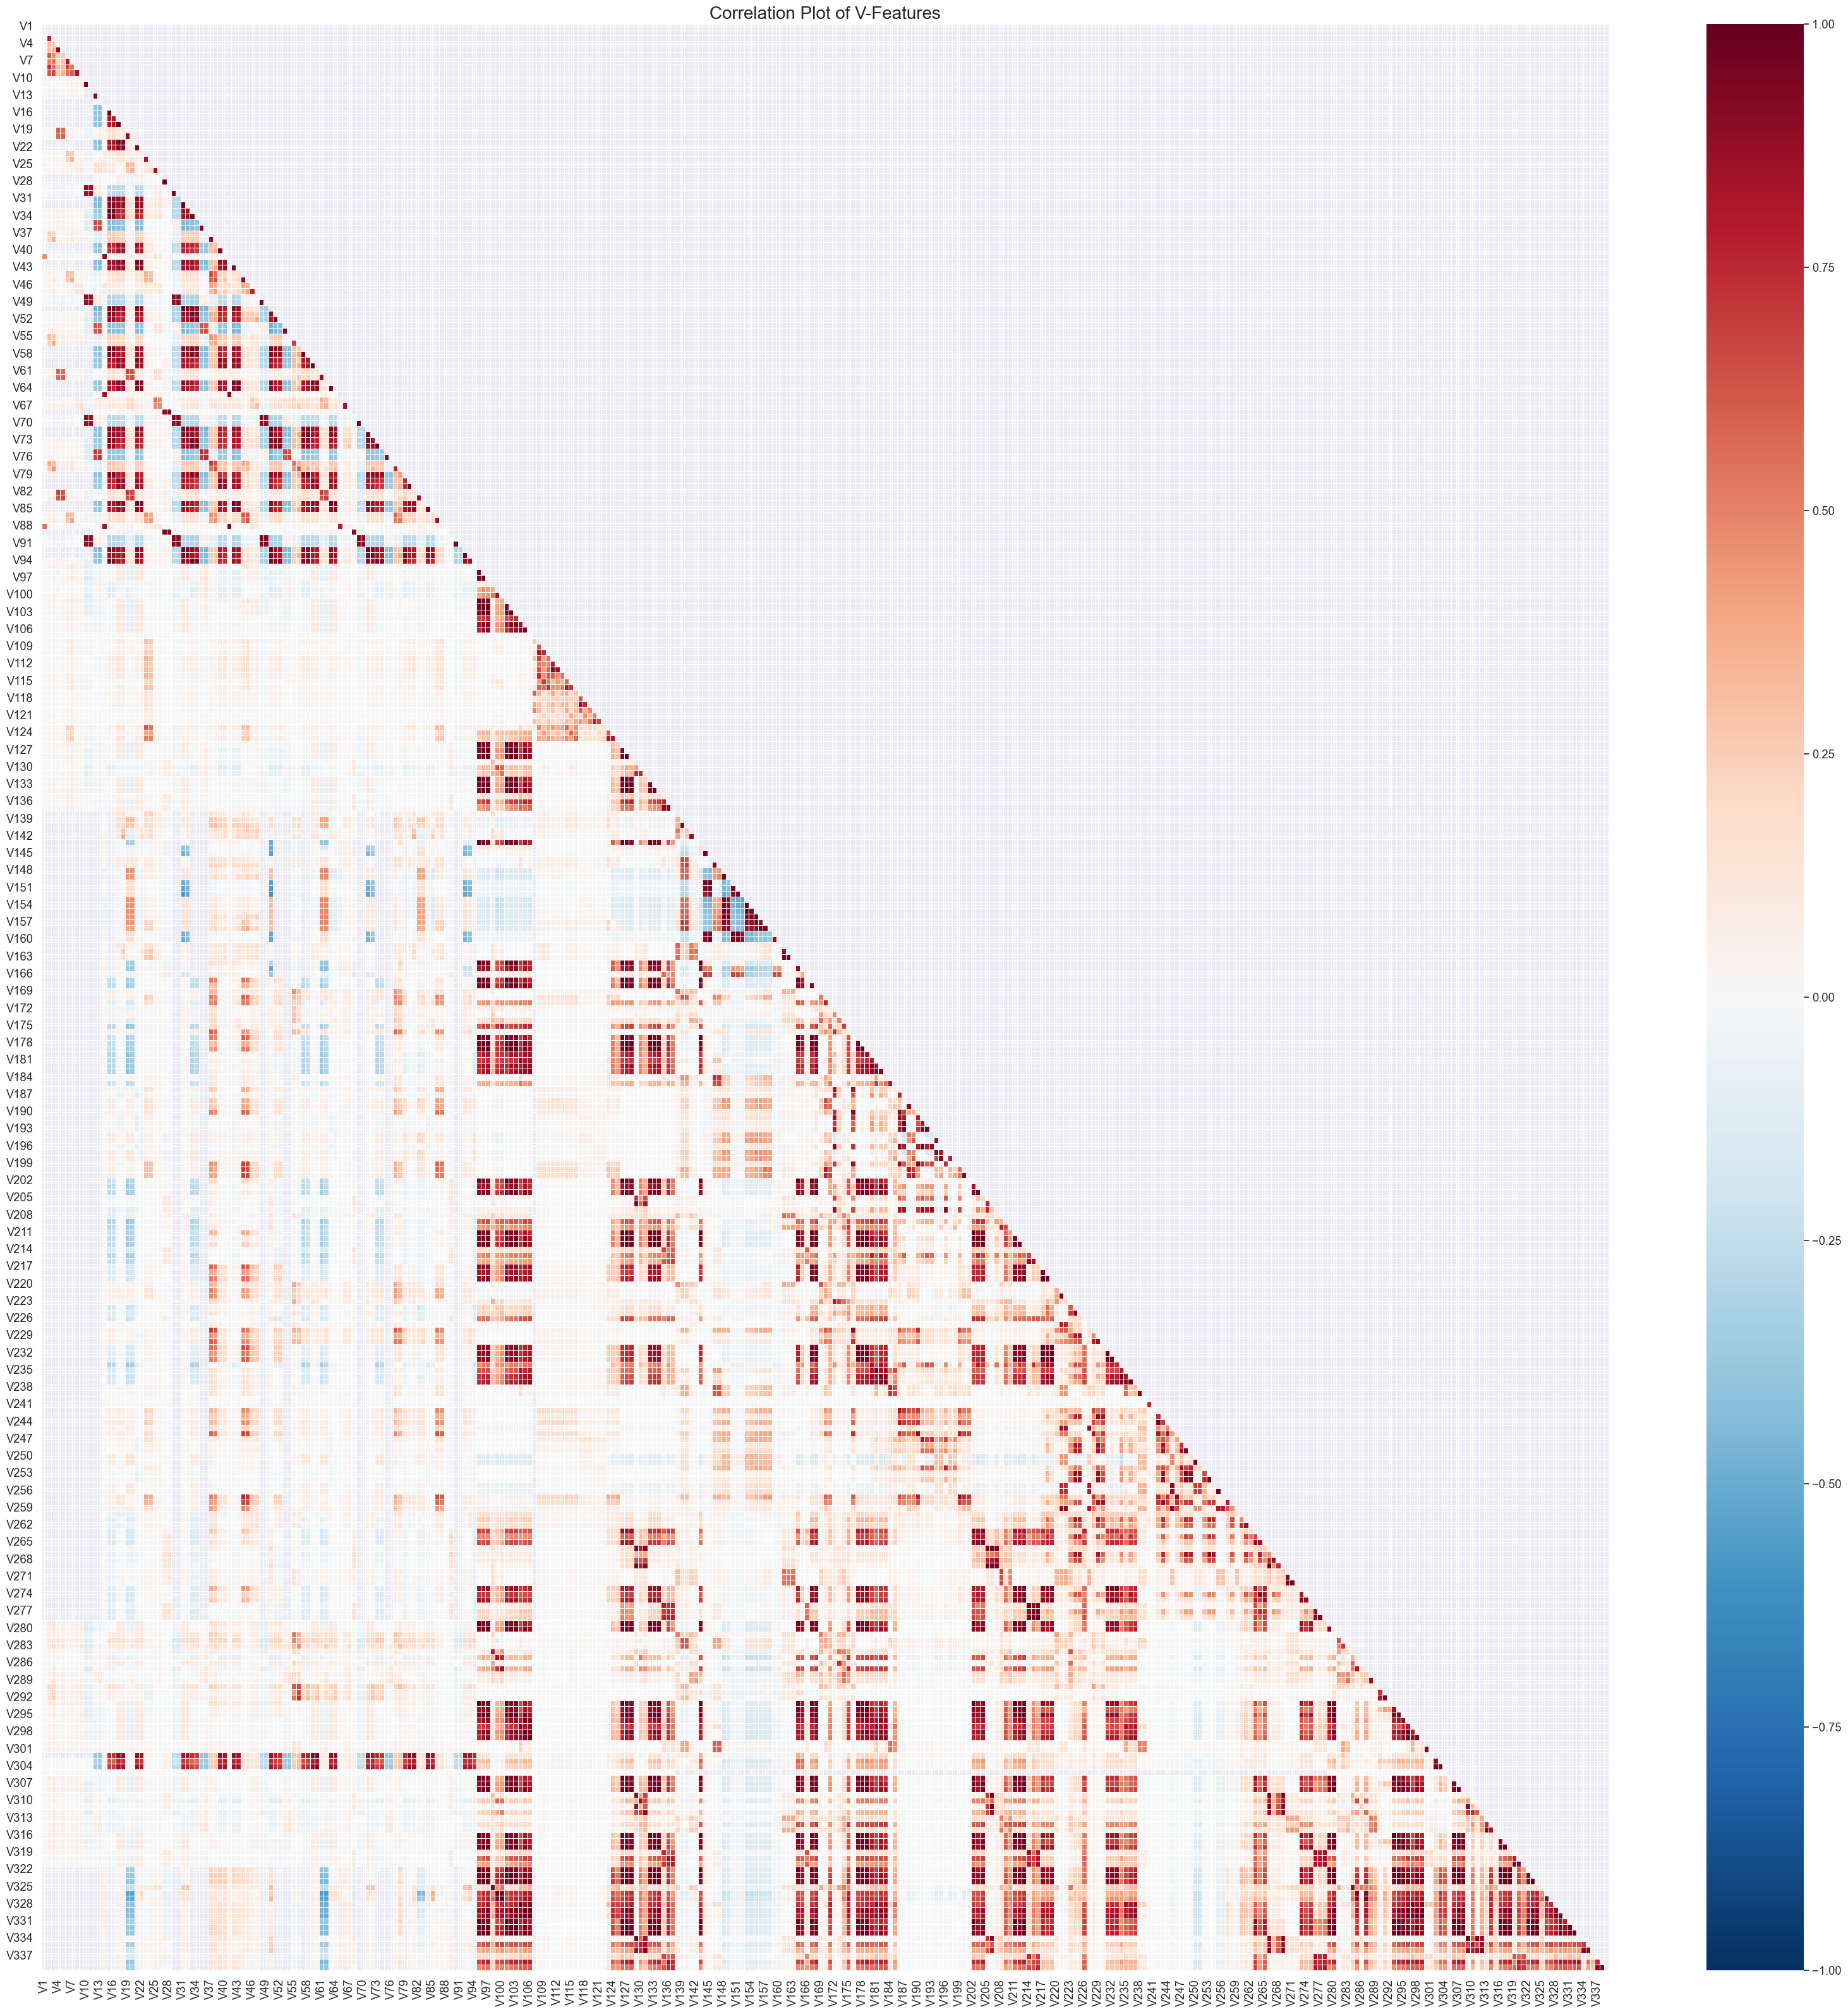

In [38]:
# Select V columns
v_columns = [col for col in train.columns if col.startswith('V')]
df_corr = train[v_columns].corr()

# Create mask to show only lower triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Set up the figure
plt.figure(figsize=(40, 40))
sns.set(font_scale=1.2)  # Adjust font scale

# Plot heatmap
sns.heatmap(df_corr, mask=mask, cmap='RdBu_r', annot=False, fmt=".1f",
            linewidths=0.5, cbar=True, vmin=-1, vmax=1)

plt.title('Correlation Plot of V-Features', fontsize=20)
plt.show()

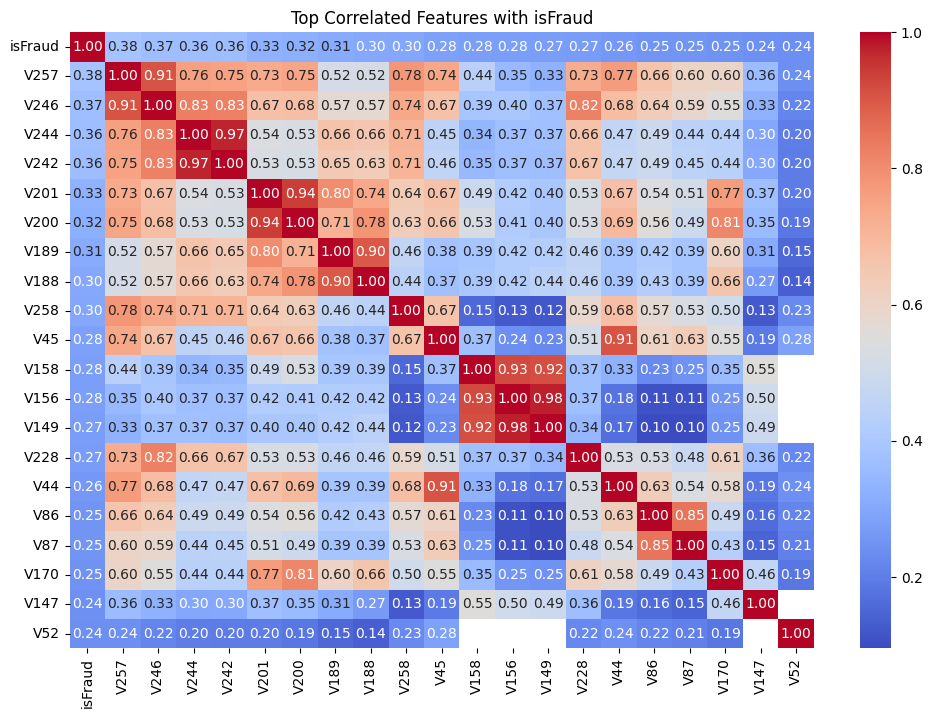

In [7]:
# Multivariate Analysis: Reduced Correlation Heatmap for Top Features
plt.figure(figsize=(12, 8))

# Drop non-informative numeric columns
exclude_cols = ['TransactionID', 'TransactionDT']
numeric_cols = [col for col in train.select_dtypes(include=[np.number]).columns if col not in exclude_cols]

# Compute full correlation matrix
corr_matrix = train[numeric_cols].corr()

# Focus on top 20 features most correlated with 'isFraud'
top_corr_features = corr_matrix['isFraud'].abs().sort_values(ascending=False).head(21).index  # 21 includes 'isFraud' itself
top_corr_matrix = train[top_corr_features].corr()

# Plot reduced heatmap
sns.heatmap(top_corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Top Correlated Features with isFraud")
plt.show()


The heatmap visually represents the correlation between the dataset’s numerical features. The color intensity indicates the strength and direction of correlation:

- Dark red: strong positive correlation
- Dark blue: strong negative correlation
- Lighter shades: weak or no correlation

Most features display weak correlations, which appear as light colors in the heatmap. This suggests that many variables are independent, contributing unique information to the model.
Some clusters show strong correlations, especially along the diagonal or in feature groups—these may indicate redundant or highly related features. A few features show negative correlations, signaling inverse relationships that could be valuable for predictive modeling.

<h4>Correlation analysis on id columns</h4>

In [32]:
id_cols = [col for col in train.columns if col[0]+col[1] == 'id']
train[id_cols].head()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T


/var/folders/hc/h8vmkcps571_4k1v0_h55fsw0000gn/T/ipykernel_52979/1531194485.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = train[id_cols].corr()


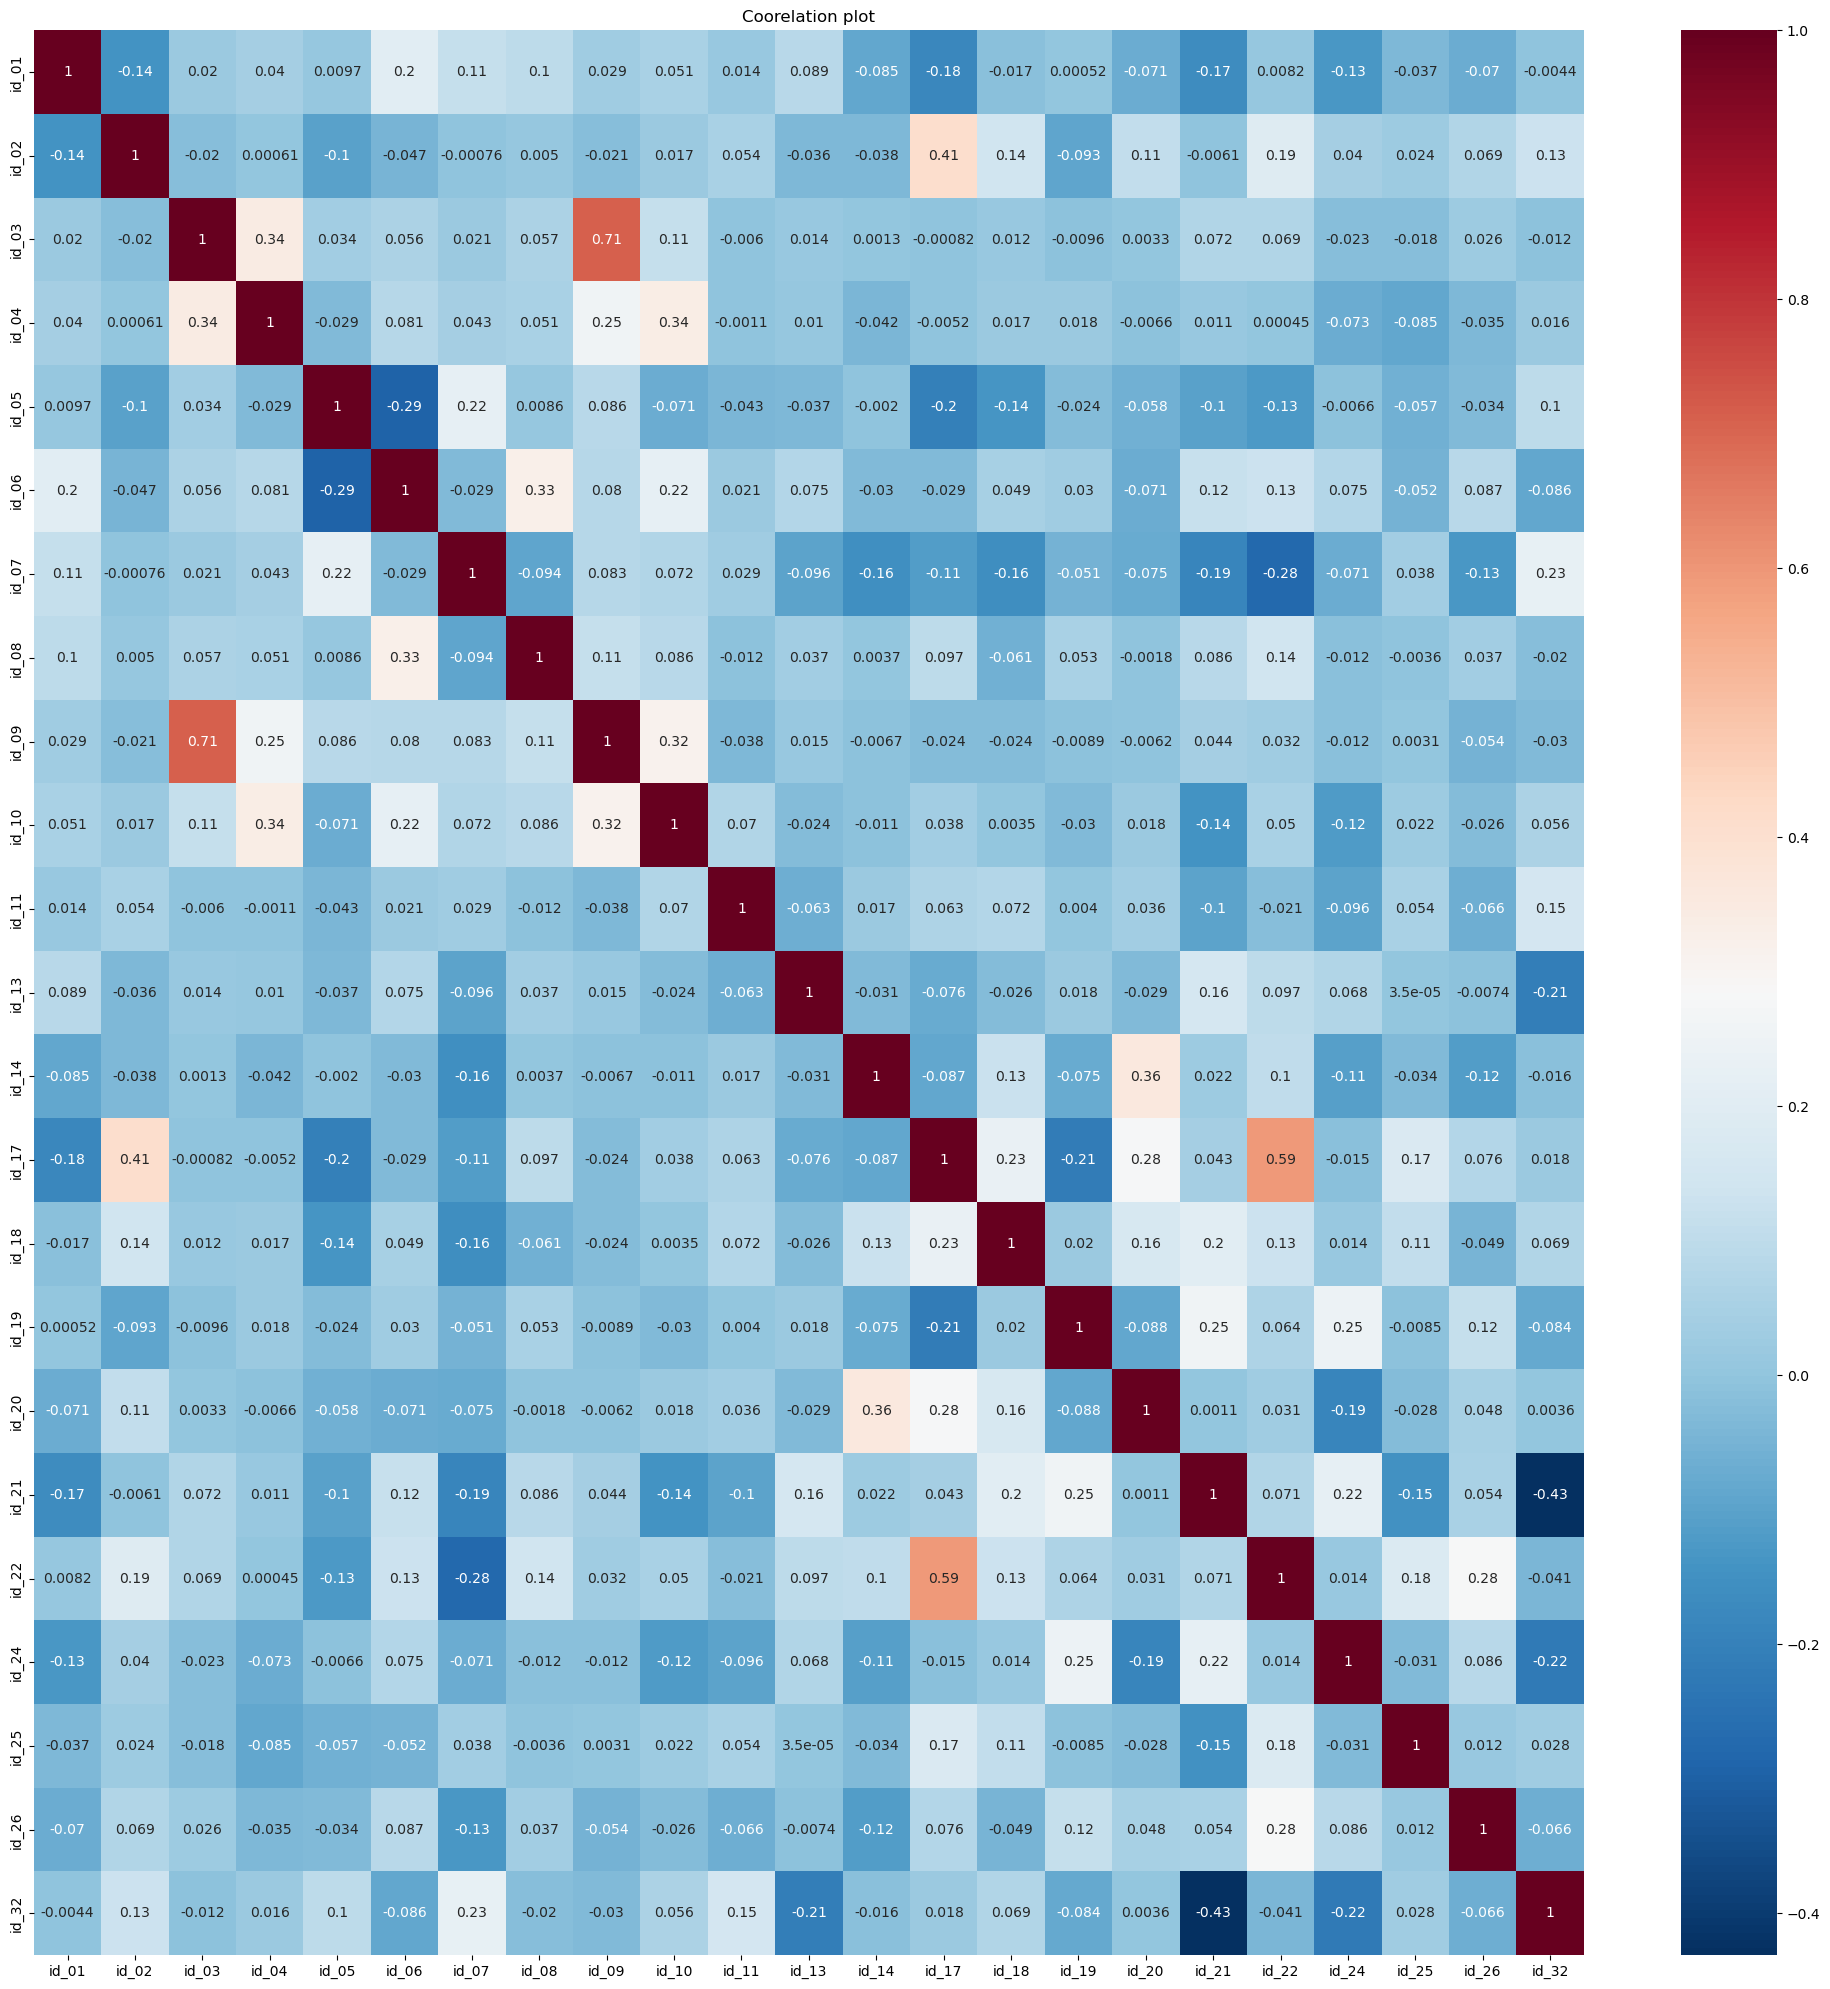

In [33]:
fig,axes = plt.subplots(1,1,figsize=(25,25))
df_corr = train[id_cols].corr()
sns.heatmap(df_corr,annot=True,cmap='RdBu_r')
axes.title.set_text('Coorelation plot')
plt.show()

Observation: We can see that there is not much of a strong coorelation between id columns

<h4>Coorelation analysis on M columns</h4>

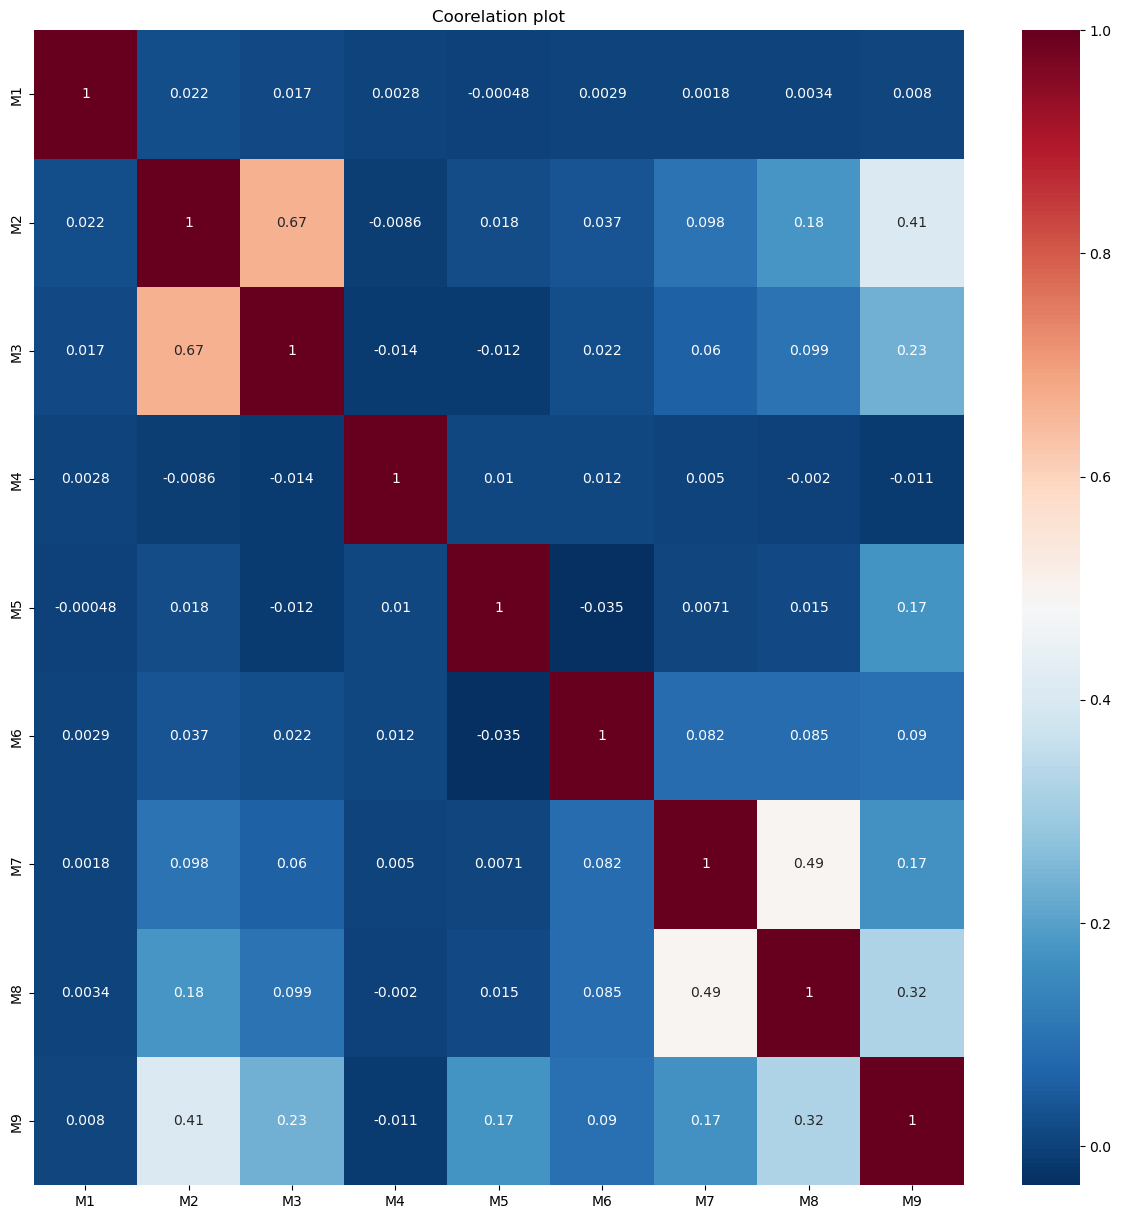

In [34]:
m_cols = [col for col in train.columns if col[0] == 'M']

mp = {'F':0,'T':1,'M0':0,'M1':1,'M2':2}
for c in m_cols: train[c] = train[c].map(mp)

fig,axes = plt.subplots(1,1,figsize=(15,15))
df_corr = train[m_cols].corr()
sns.heatmap(df_corr,annot=True,cmap='RdBu_r')
axes.title.set_text('Coorelation plot')
plt.show()

<h4>Coorelation analysis on D columns</h4>

/var/folders/hc/h8vmkcps571_4k1v0_h55fsw0000gn/T/ipykernel_52979/2547657563.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = train[d_cols].corr()


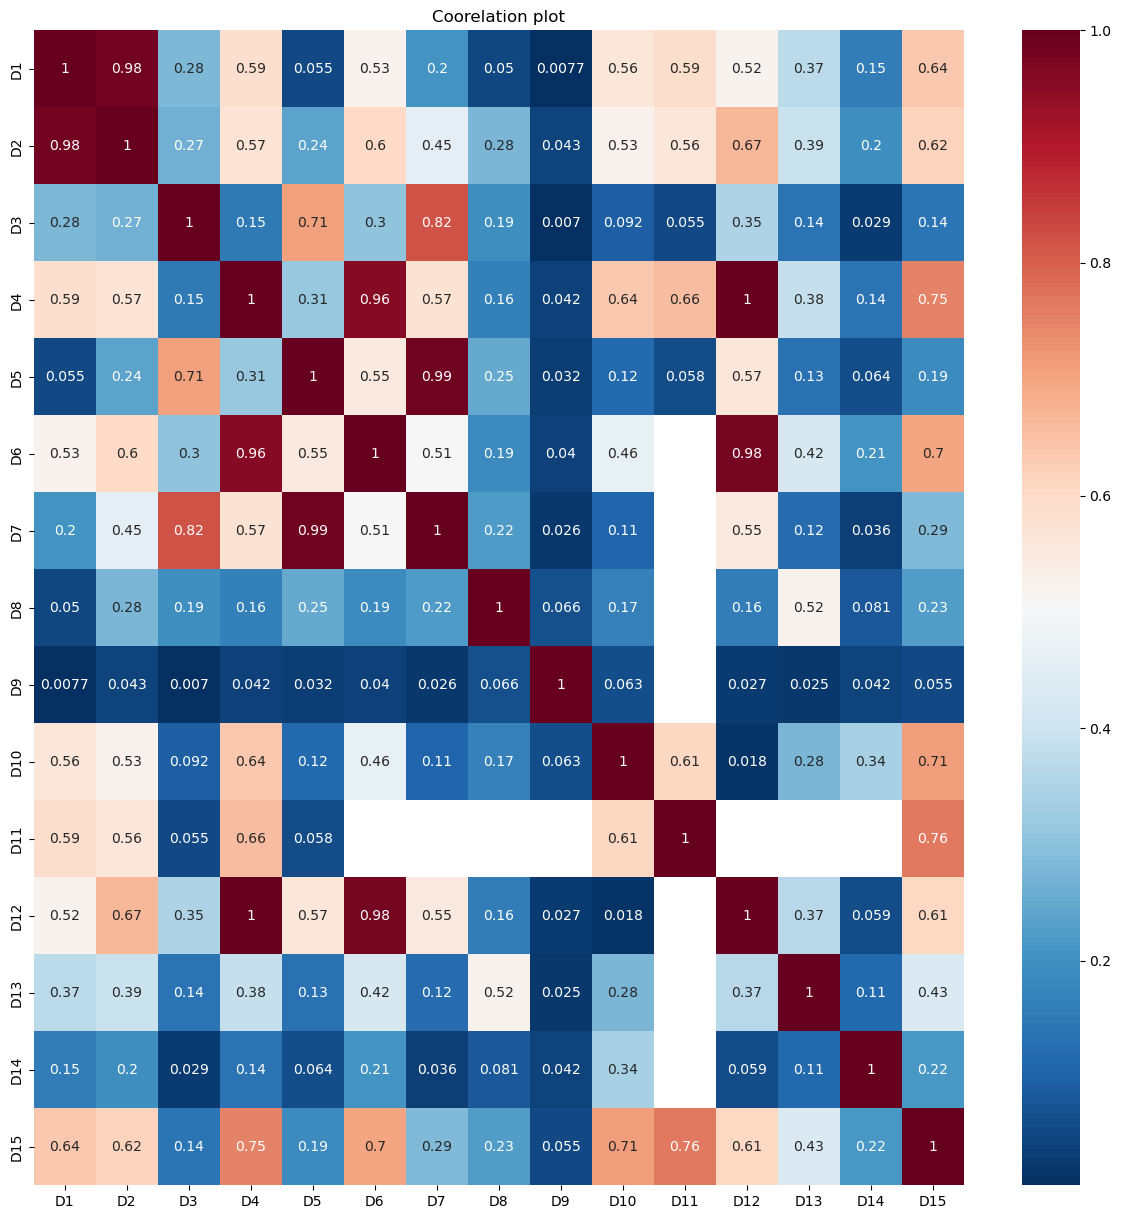

In [35]:
d_cols = [col for col in train.columns if col[0] == 'D']


fig,axes = plt.subplots(1,1,figsize=(15,15))
df_corr = train[d_cols].corr()
sns.heatmap(df_corr,annot=True,cmap='RdBu_r')
axes.title.set_text('Coorelation plot')
plt.show()

Identify Non-Numeric Columns

In [8]:
non_numeric_cols = train.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)



Non-numeric columns: Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')


In [9]:
#Label Encoding (for categorical columns with order)
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))
    label_encoders[col] = le  # Store encoders if you need to inverse transform later



In [10]:
import numpy as np

# Check for NaNs
print("Missing values:\n", train.isnull().sum())

# Check for infinite values
print("Infinite values:\n", np.isinf(train.select_dtypes(include=[np.number])).sum())


Missing values:
 TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
                 ..
id_36             0
id_37             0
id_38             0
DeviceType        0
DeviceInfo        0
Length: 434, dtype: int64
Infinite values:
 TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
                 ..
id_36             0
id_37             0
id_38             0
DeviceType        0
DeviceInfo        0
Length: 434, dtype: int64


In [11]:
#Replace infinities with NaN and then fill them
train.replace([np.inf, -np.inf], np.nan, inplace=True)
train.fillna(train.median(), inplace=True)



In [ ]:
#Variance Inflation Factor (VIF) calculation:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = train  # Use the cleaned dataset

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)



In [34]:
train.shape # columns and rows of train dataset

(590540, 434)

In [35]:
#Here we want to confirm how many of the transaction dataset has its corresponding identity.
print(np.sum(train_transaction['TransactionID'].isin(train_identity["TransactionID"].unique())))


141907
144233


Observation: 
Only 24.4% which is 144233 transactionID out of 590540 train_transaction has associated train_identity.

<h4>Handling missing values:</h4>


In [4]:
def top_missing_cols(df,n=10,thresh=80):
    """
    returns missing columns in dataframe with missing values percent > thresh
    if n=None. It will give whole dataframe with missing values percent > thresh
    """
    
    dff = (df.isnull().sum()/df.shape[0])*100
    dff = dff.reset_index()
    dff.columns = ['col','missing_percent']
    dff = dff.sort_values(by=['missing_percent'],ascending=False).reset_index(drop=True)
    print(f'There are {df.isnull().any().sum()} columns in this dataset with missing values.')
    print(f'There are {dff[dff["missing_percent"] > thresh].shape[0]} columns with missing percent values than {thresh}%')
    if n:
        return dff.head(n)
    else:
        return dff

In [5]:
df_missing = top_missing_cols(train,n=None,thresh=30)
# Taking all column with missing percen > 30
missing_cols = df_missing['col']

There are 414 columns in this dataset with missing values.
There are 232 columns with missing percent values than 30%


In [7]:
top_missing_cols(train, thresh=30)

There are 414 columns in this dataset with missing values.
There are 232 columns with missing percent values than 30%


,col,missing_percent
0,id_24,99.196159
1,id_25,99.130965
2,id_07,99.127070
3,id_08,99.127070
4,id_21,99.126393
5,id_26,99.125715
6,id_27,99.124699
7,id_23,99.124699
8,id_22,99.124699
9,dist2,93.628374


We drop columns with >30% missing values (too much missing data makes them unreliable).
Filled remaining missing values using appropriate techniques (median for numerical, mode for categorical)

In [8]:
# Check missing values
missing = train.isnull().sum() / len(train) * 100
high_missing = missing[missing > 30]
print("Columns with >30% missing values:\n", high_missing)

# Drop columns with more than 30% missing values
train.drop(columns=high_missing.index, inplace=True)

# Impute remaining missing values
for col in train.select_dtypes(include=['float64', 'int64']):
    train[col].fillna(train[col].median(), inplace=True)
    
for col in train.select_dtypes(include=['object']):
    train[col].fillna(train[col].mode()[0], inplace=True)


Columns with >30% missing values:
 dist1            59.652352
dist2            93.628374
R_emaildomain    76.751617
D2               47.549192
D3               44.514851
                   ...    
id_36            76.126088
id_37            76.126088
id_38            76.126088
DeviceType       76.155722
DeviceInfo       79.905510
Length: 232, dtype: float64


/var/folders/hc/h8vmkcps571_4k1v0_h55fsw0000gn/T/ipykernel_24653/1236129805.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace=True)
/var/folders/hc/h8vmkcps571_4k1v0_h55fsw0000gn/T/ipykernel_24653/1236129805.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [37]:
# Check for duplicate rows
print(train.duplicated().sum())

0


Observation: There are no duplicated rows in the train dataset.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We will explore and visualize the binary target column "isFraud". The labeling logic behind isFraud=1 is any reported charegback transaction that are disputed by the cardholders or any future purchased made by the user account, associated email address and transactios directly linked to these attributes as fraud transaction. Whereas, isFraud=0 is any transactions that are not reported as chargeback or none of the above is found after 120 days, which is define as legit. Normally, fraud dataset are highly imbalanced. So we will explore what the given data looks like.

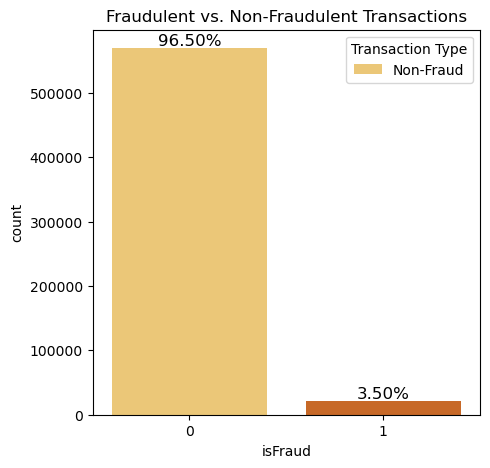

In [7]:
#Fraudulent vs Non-fradulent transaction
plt.figure(figsize=(5,5))
ax = sns.countplot(x='isFraud', data=train, palette="YlOrBr")

# Set title
plt.title("Fraudulent vs. Non-Fraudulent Transactions")

#total the percentage and labels on bars
total = len(train)  # Total number of transactions
for p in ax.patches:
    percentage = f'{p.get_height()/total * 100:.2f}%'  # Calculate percentage
    ax.annotate(percentage, 
                (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.legend(["Non-Fraud", "Fraud"], title="Transaction Type")

plt.show()

In [40]:
train["isFraud"].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

Observation: We have seen that fraud transaction are highly imbalanced. The fraudulent transaction are less compared to the non-fradulent transaction. To deal with such imbalance data, we have to use the sampling techniques such as SMOTE(Synthetic Minority Over-Sampling Technique). Oversampling techniques on minority class (isFraud=1) and undersampling techniques to majority class (isfraud=0).

In [8]:
# Outlier Detection
## 1. Using IQR
Q1 = train['TransactionAmt'].quantile(0.25)
Q3 = train['TransactionAmt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_merged = train[(train['TransactionAmt'] >= lower_bound) & 
                            (train['TransactionAmt'] <= upper_bound)]

Use Interquartile Range (IQR) to flag extreme values in TransactionAmt

Transaction Amount

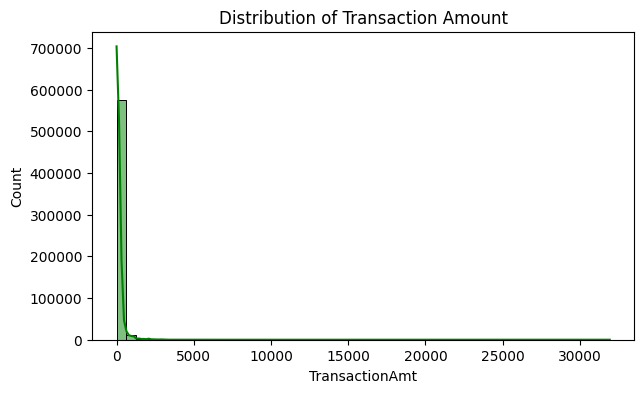

In [9]:
# Transaction Amount Distribution
plt.figure(figsize=(7,4))
sns.histplot(train['TransactionAmt'], bins=50, kde=True, color='green')
plt.title('Distribution of Transaction Amount')
plt.show()

Observation: We will have to take a log transformationn in TransactionAmt to show the distribution as right now it is skewed to the right because of the large transaction. Any values between 0 and 1 will appear to be negative because of the log transform. Reduce the impact of the extreme values (outliers).

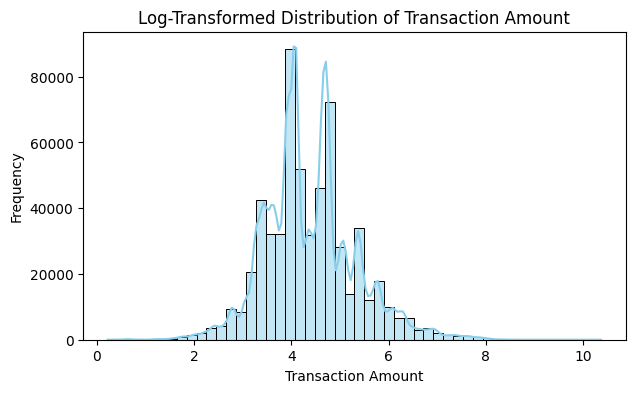

In [23]:
#Apply log transformation 
train['TransactionAmt_log'] =np.log1p(train["TransactionAmt"])

plt.figure(figsize=(7,4))
sns.histplot(train['TransactionAmt_log'], bins=50, kde=True, color='skyblue')
plt.title('Log-Transformed Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

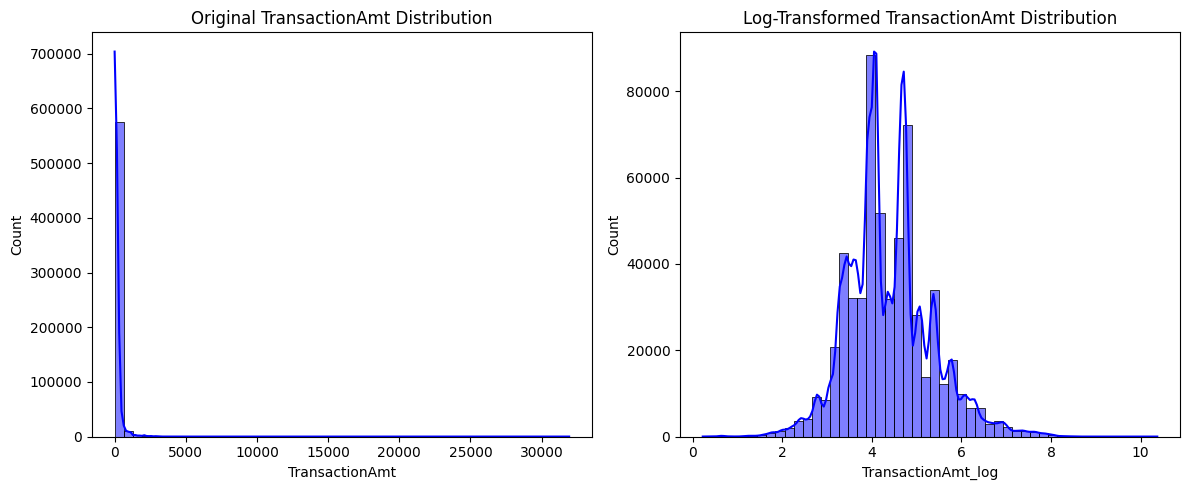

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Original
plt.subplot(1, 2, 1)
sns.histplot(train['TransactionAmt'], bins=50, kde=True, color="blue", edgecolor='black', lw=5)
plt.title('Original TransactionAmt Distribution')

# Log-transformed
plt.subplot(1, 2, 2)
sns.histplot(train['TransactionAmt_log'], bins=50, kde=True, color='blue', edgecolor='black', lw=5)
plt.title('Log-Transformed TransactionAmt Distribution')

plt.tight_layout()
plt.show()


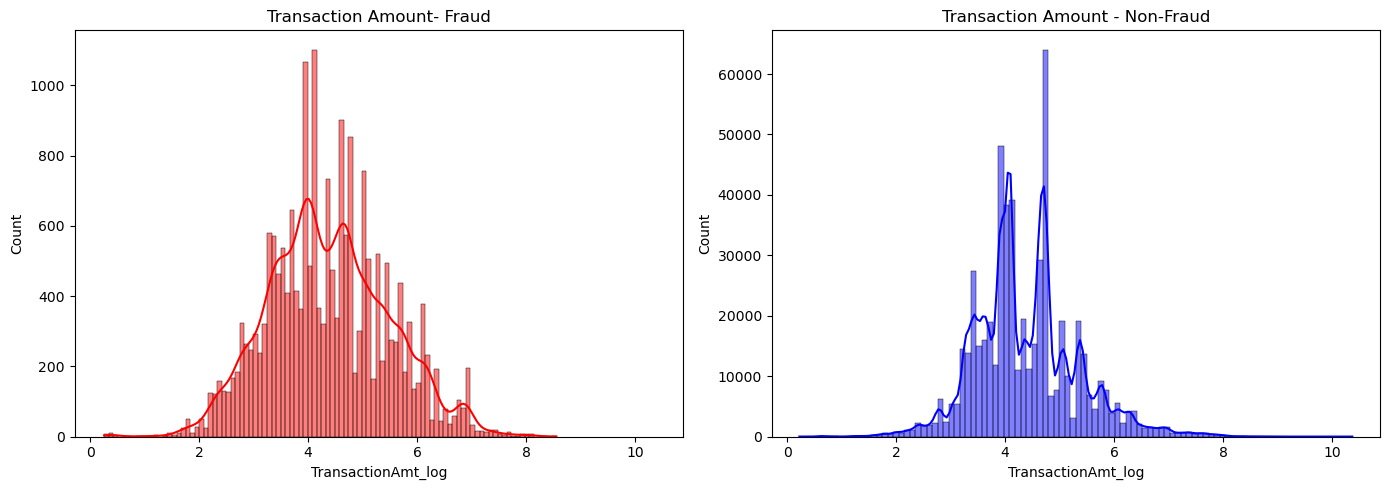

In [43]:
#Let's visualize the Fraud vs Non-Fraud Transaction Amount Distribution
fig,axes =plt.subplots(1, 2, figsize=(14,5), sharex=True)

#Fraud Transaction

sns.histplot(train.loc[train['isFraud']== 1,'TransactionAmt_log'], 
             bins=100, kde=True, color="red", ax=axes[0])
axes[0].set_title("Transaction Amount- Fraud")

# Non-Fraud Transactions
sns.histplot(train.loc[train['isFraud'] == 0, 'TransactionAmt_log'], 
             bins=100, kde=True, color='blue', ax=axes[1])
axes[1].set_title('Transaction Amount - Non-Fraud')

plt.tight_layout()
plt.show()


Observation: Based on the distribution above, non-fraudulent transactions have higher transaction amounts, whereas fraudulent transactions are more evenly distributed and tend to cluster at lower values.

Feature Engineering

TransactionDT: this feature is a timedelta from a given reference datatime (not an actual timestamp). With the time features, we can find out what time of the day, what day of the week, or what days of the month are the peak time for fradulent activities.

In [9]:
train["TransactionDT"].shape[0], train["TransactionDT"].nunique()

(590540, 573349)

In [44]:
#start by finding the minimum transactionDT
min_transactionDT = train['TransactionDT'].min()
print("Earliest TransactionDT:", min_transactionDT)

import datetime

# Assume reference date (e.g., "2017-12-01") as in the kaggle discussion many assumed and used this as a start date
reference_date = datetime.datetime(2017, 12, 1)

# Compute estimated start date
start_date = reference_date - datetime.timedelta(seconds=min_transactionDT)
print("Estimated Start Date:", start_date)


Earliest TransactionDT: 86400
Estimated Start Date: 2017-11-30 00:00:00


In [45]:
#Since 86,400 seconds = 1 day, this means the dataset likely starts counting from November 29, 2017

# start date (TransactionDT=0 assumed to be 2017-11-29)
start_date = datetime.datetime(2017, 11, 29)

# Convert TransactionDT to actual datetime
train['TransactionDate'] = train['TransactionDT'].apply(lambda x: start_date + datetime.timedelta(seconds=x))

# Let's display first few rows
print(train[['TransactionDT', 'TransactionDate']].head())


   TransactionDT     TransactionDate
0          86400 2017-11-30 00:00:00
1          86401 2017-11-30 00:00:01
2          86469 2017-11-30 00:01:09
3          86499 2017-11-30 00:01:39
4          86506 2017-11-30 00:01:46


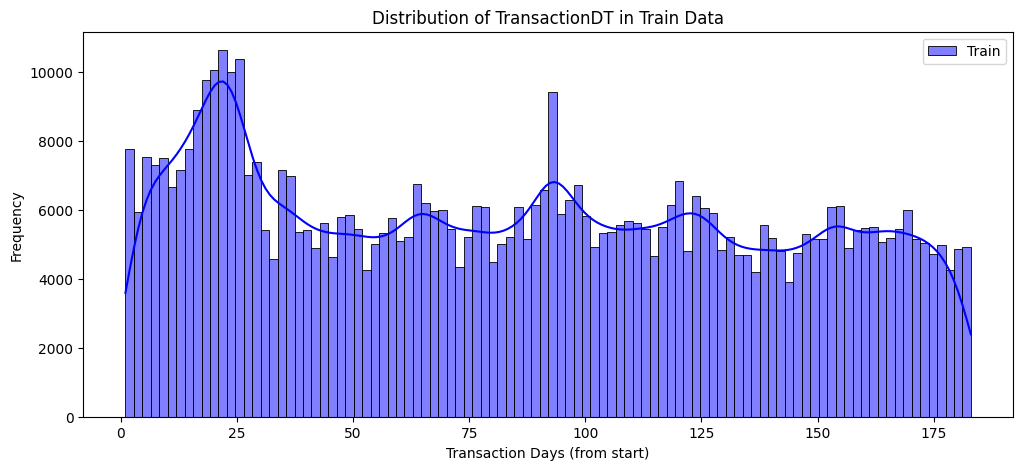

In [3]:
# Convert TransactionDT to days for better visualization
train['TransactionDays'] = train['TransactionDT'] / (24 * 60 * 60)  # Convert seconds to days
#test['TransactionDays'] = test['TransactionDT'] / (24 * 60 * 60)

# Plot TransactionDT distribution for train & test
plt.figure(figsize=(12,5))
sns.histplot(train['TransactionDays'], label='Train', color='blue', bins=100, kde=True)
#sns.histplot(test['TransactionDays'], label='Test', color='red', bins=100, kde=True)

# Labels and title
plt.xlabel("Transaction Days (from start)")
plt.ylabel("Frequency")
plt.title("Distribution of TransactionDT in Train Data")
plt.legend()
plt.show()


Observation: The train dataset transaction span from 0 to 180 days. The train dataset has higher transaction frequency initially and fluctuates over time.  

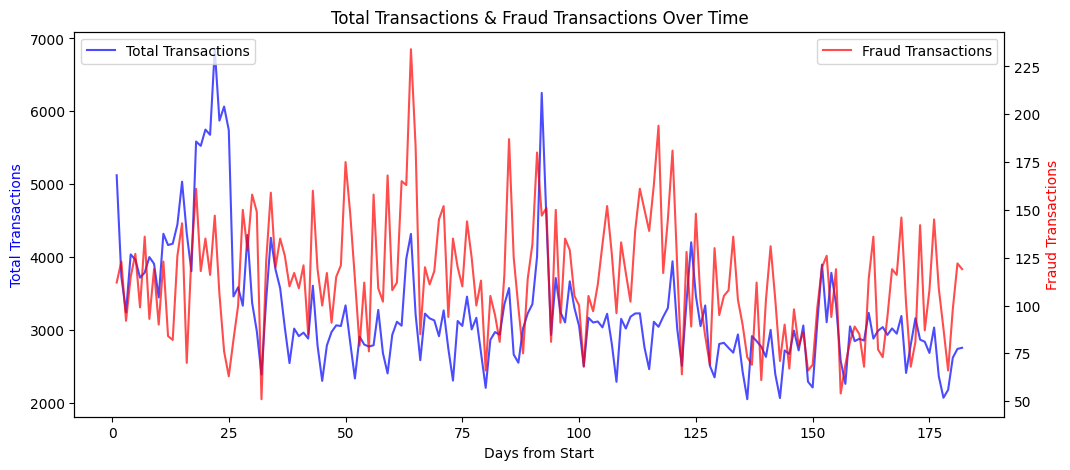

In [15]:
#Let'ss visualize TransactionDT, total transactions and fraud trend over time. 

train['TransactionDay'] = (train['TransactionDT'] // (60 * 60 * 24))  # Convert seconds to days

# Group by TransactionDay
daily_counts = train.groupby('TransactionDay').size()
fraud_counts = train[train['isFraud'] == 1].groupby('TransactionDay').size()

# Plot time series
fig, ax1 = plt.subplots(figsize=(12,5))

ax1.plot(daily_counts.index, daily_counts, label="Total Transactions", color='blue', alpha=0.7)
ax1.set_ylabel("Total Transactions", color='blue')
ax1.set_xlabel("Days from Start")
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(fraud_counts.index, fraud_counts, label="Fraud Transactions", color='red', alpha=0.7)
ax2.set_ylabel("Fraud Transactions", color='red')
ax2.legend(loc='upper right')

plt.title("Total Transactions & Fraud Transactions Over Time")
plt.show()


Observation: Fraudulent transaction do not simply follow the total transaction volume. for instance, when fradulent transaction peak the total transaction remain steady, which might indicate that the trageted fardulent attacks. Another indication that the fraudsters strategically time their attacks rather than blending into regular transaction trends. 

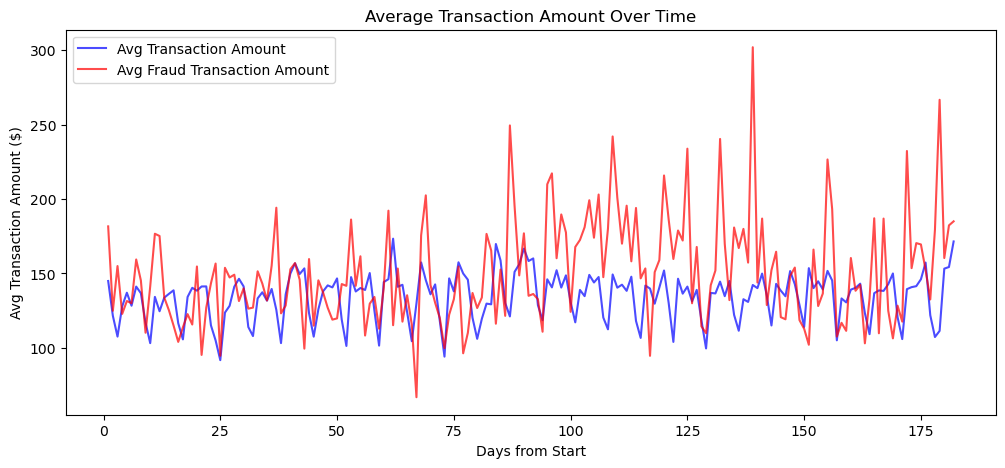

In [48]:
# Compute daily mean transaction amount
daily_avg_amt = train.groupby('TransactionDay')['TransactionAmt'].mean()
fraud_avg_amt = train[train['isFraud'] == 1].groupby('TransactionDay')['TransactionAmt'].mean()

# Plot
plt.figure(figsize=(12,5))
plt.plot(daily_avg_amt.index, daily_avg_amt, label="Avg Transaction Amount", color='blue', alpha=0.7)
plt.plot(fraud_avg_amt.index, fraud_avg_amt, label="Avg Fraud Transaction Amount", color='red', alpha=0.7)

plt.xlabel("Days from Start")
plt.ylabel("Avg Transaction Amount ($)")
plt.title("Average Transaction Amount Over Time")
plt.legend()
plt.show()


Observation:Fradulent transaction often show a higer average transaction amount, suggesting they might be attempting higher value transaction. Sometimes, the fradulent transactions amounts align with normal trasaction amounts, which may indicate attempts to mimic genuine transaction behavior to avoid detection. 

/var/folders/hc/h8vmkcps571_4k1v0_h55fsw0000gn/T/ipykernel_1032/3955140406.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_hour.index, y=fraud_by_hour.values, palette=colors, ax=ax1)


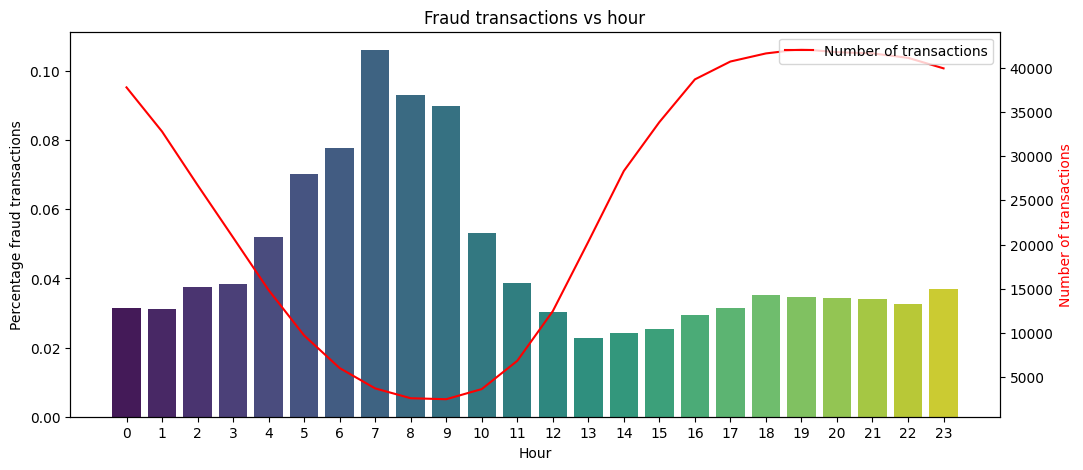

In [20]:
# Ensure datetime conversion 
train['TransactionDT'] = pd.to_timedelta(train['TransactionDT'], unit='s')
train['hour'] = (train['TransactionDT'].dt.total_seconds() // 3600 % 24).astype(int)
train['dayofweek'] = (train['TransactionDT'].dt.total_seconds() // (3600*24) % 7).astype(int)

# Fraud % by hour
fraud_by_hour = train.groupby('hour')['isFraud'].mean()
count_by_hour = train['hour'].value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(12, 5))
colors = sns.color_palette("viridis", len(fraud_by_hour))

sns.barplot(x=fraud_by_hour.index, y=fraud_by_hour.values, palette=colors, ax=ax1)
ax1.set_ylabel("Percentage fraud transactions", color='black')
ax1.set_xlabel("Hour")
ax1.set_title("Fraud transactions vs hour")

ax2 = ax1.twinx()
ax2.plot(count_by_hour.index, count_by_hour.values, color="red", label='Number of transactions')
ax2.set_ylabel("Number of transactions", color='red')
ax2.legend(loc="upper right")
plt.show()




/var/folders/hc/h8vmkcps571_4k1v0_h55fsw0000gn/T/ipykernel_1032/920246577.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_day.index, y=fraud_by_day.values, palette=colors, ax=ax1)


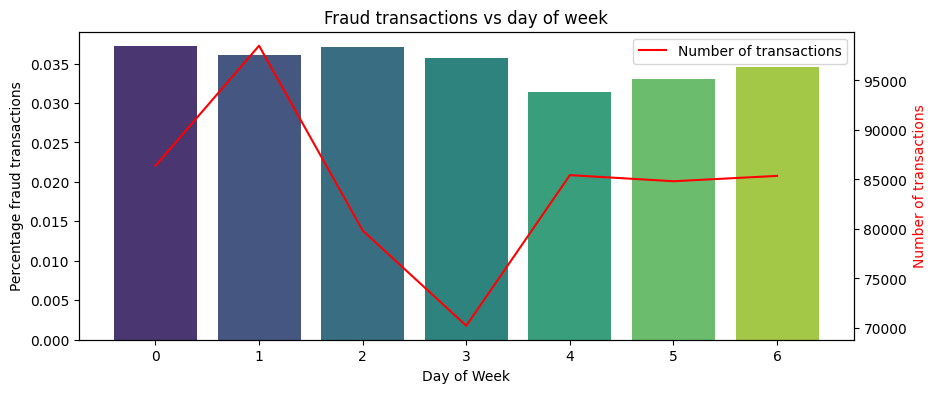

In [21]:
# Fraud % by day of week
fraud_by_day = train.groupby('dayofweek')['isFraud'].mean()
count_by_day = train['dayofweek'].value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(10, 4))
colors = sns.color_palette("viridis", len(fraud_by_day))

sns.barplot(x=fraud_by_day.index, y=fraud_by_day.values, palette=colors, ax=ax1)
ax1.set_ylabel("Percentage fraud transactions", color='black')
ax1.set_xlabel("Day of Week")
ax1.set_title("Fraud transactions vs day of week")

ax2 = ax1.twinx()
ax2.plot(count_by_day.index, count_by_day.values, color="red", label='Number of transactions')
ax2.set_ylabel("Number of transactions", color='red')
ax2.legend(loc="upper right")
plt.show()

Card4 (card type) and card6 (Debit or credit): One of the questions that we want to understand in this project is what is the rate of fraud in debit card transaction compared to credit card transaction. Understanding whether fraudsters target one type of card more than the other can help financial institutions adjust their security measures accordingly. 

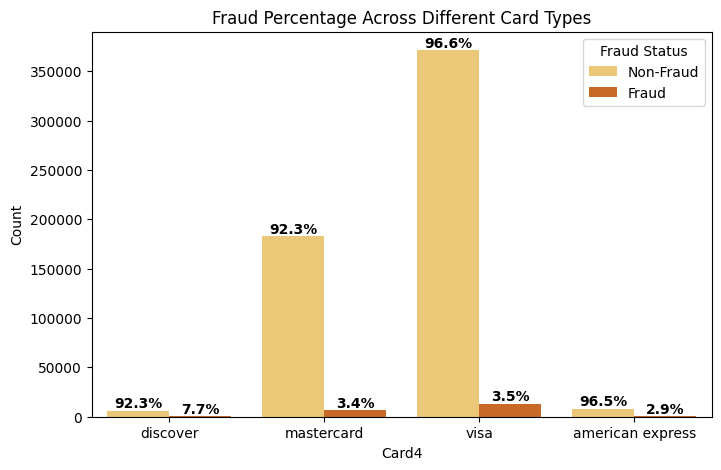

In [3]:
#A count plot helps to compare the distribution of transaction amounts across different card4 categories while distinguishing fraud (isFraud = 1) and non-fraud (isFraud = 0)
# Compute counts for each category
card4_counts = train.groupby('card4')['isFraud'].value_counts(normalize=True).unstack() * 100

# Plot the countplot
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='card4', hue='isFraud', data=train, palette="YlOrBr")

# Annotate bars with correct percentages
total_counts = train['card4'].value_counts()  # Total per category

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid division by zero
        card_type = p.get_x()  # Get x-axis position (corresponds to card4)
        fraud_status = 0 if p.get_facecolor() == ax.patches[0].get_facecolor() else 1  # Detect fraud status by color
        percentage = card4_counts.loc[train['card4'].unique()[int(card_type)], fraud_status]
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Labels and title
plt.title("Fraud Percentage Across Different Card Types")
plt.xlabel("Card4")
plt.ylabel("Count")
plt.legend(title="Fraud Status", labels=["Non-Fraud", "Fraud"])
plt.show()

/var/folders/hc/h8vmkcps571_4k1v0_h55fsw0000gn/T/ipykernel_73204/1051162202.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


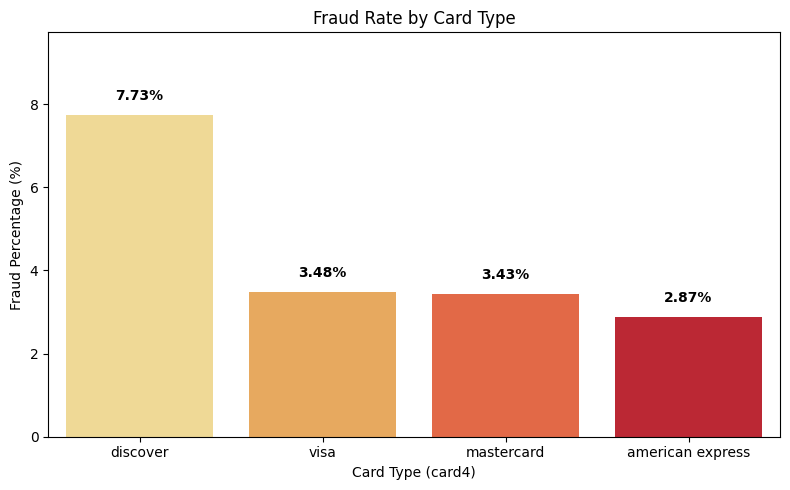

In [9]:
# Compute fraud percentage for each card type
fraud_percent_by_card = (
    train.groupby('card4')['isFraud']
    .mean()
    .mul(100)
    .reset_index()
    .rename(columns={'isFraud': 'FraudPercentage'})
    .sort_values(by='FraudPercentage', ascending=False)
)

# Create plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='card4',
    y='FraudPercentage',
    data=fraud_percent_by_card,
    order=fraud_percent_by_card['card4'],
    palette='YlOrRd'
)

# Annotate bars using actual bar positions
for bar, label in zip(ax.patches, fraud_percent_by_card['FraudPercentage']):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y + 0.3, f"{label:.2f}%", ha='center', va='bottom', fontweight='bold')

# Final plot settings
plt.title("Fraud Rate by Card Type")
plt.xlabel("Card Type (card4)")
plt.ylabel("Fraud Percentage (%)")
plt.ylim(0, fraud_percent_by_card['FraudPercentage'].max() + 2)
plt.tight_layout()
plt.show()





In [50]:
train[train['isFraud']==1]['card4'].value_counts(normalize=True)

visa                0.649180
mastercard          0.314378
discover            0.024875
american express    0.011567
Name: card4, dtype: float64

In [51]:
train.groupby('card4')['isFraud'].value_counts(normalize=True)

card4             isFraud
american express  0          0.971302
                  1          0.028698
discover          0          0.922718
                  1          0.077282
mastercard        0          0.965669
                  1          0.034331
visa              0          0.965280
                  1          0.034720
Name: isFraud, dtype: float64

Observation: In the graph, it looked like visa card has the highest instances of fraud (64%). But when we categorized the card type by the fraud status, we learned that visa has fraud rate of only 3.4% which is less than Discovercard. 

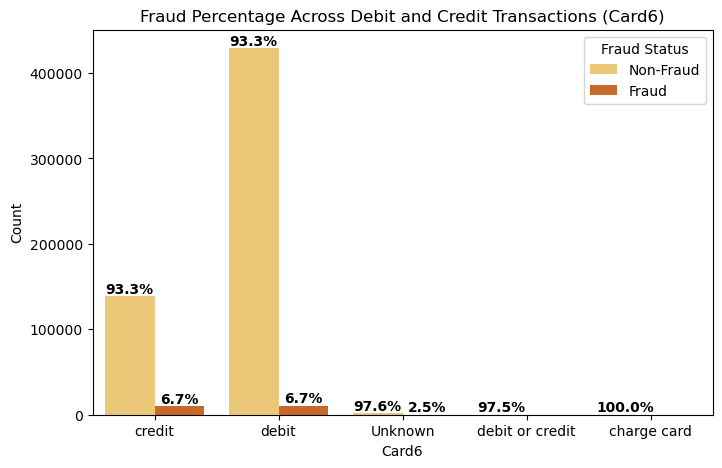

In [27]:
#Now, we will visulaize the card6 to check the debit and credit transaction
# Fill missing values in 'card6' with a placeholder
train['card6'].fillna('Unknown', inplace=True)
                                  
# Compute fraud percentage within each 'card6' category
card6_counts = train.groupby('card6')['isFraud'].value_counts(normalize=True).unstack() * 100

# Plot the countplot
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='card6', hue='isFraud', data=train, palette="YlOrBr")

# Annotate bars with correct percentages
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid division by zero
        card_type = p.get_x()  # Get x-axis position (corresponds to card6)
        fraud_status = 0 if p.get_facecolor() == ax.patches[0].get_facecolor() else 1  # Detect fraud status by color
        card6_category = train['card6'].unique()[int(card_type)]  # Map x position to category
        percentage = card6_counts.loc[card6_category, fraud_status]  # Get the correct fraud percentage
        
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Labels and title
plt.title("Fraud Percentage Across Debit and Credit Transactions (Card6)")
plt.xlabel("Card6")
plt.ylabel("Count")
plt.legend(title="Fraud Status", labels=["Non-Fraud", "Fraud"])
plt.show()

/var/folders/hc/h8vmkcps571_4k1v0_h55fsw0000gn/T/ipykernel_73204/2670749295.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


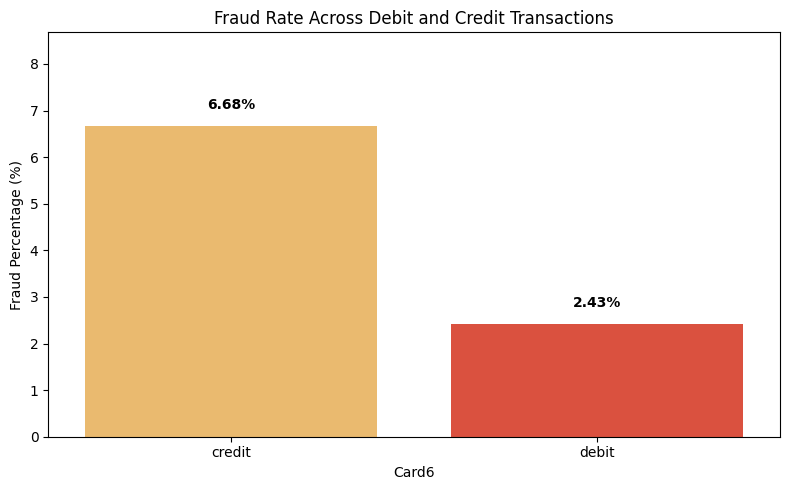

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out unwanted card types
filtered = train[~train['card6'].isin(['charge card', 'debit or credit'])]

# Compute fraud percentage for each card6 type
fraud_percent_by_card = (
    filtered.groupby('card6')['isFraud']
    .mean()
    .mul(100)
    .reset_index()
    .rename(columns={'isFraud': 'FraudPercentage'})
    .sort_values(by='FraudPercentage', ascending=False)
)

# Create plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='card6',
    y='FraudPercentage',
    data=fraud_percent_by_card,
    order=fraud_percent_by_card['card6'],
    palette='YlOrRd'
)

# Annotate bars
for bar, label in zip(ax.patches, fraud_percent_by_card['FraudPercentage']):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y + 0.3, f"{label:.2f}%", ha='center', va='bottom', fontweight='bold')

# Final plot settings
plt.title("Fraud Rate Across Debit and Credit Transactions")
plt.xlabel("Card6")
plt.ylabel("Fraud Percentage (%)")
plt.ylim(0, fraud_percent_by_card['FraudPercentage'].max() + 2)
plt.tight_layout()
plt.show()


In [53]:
train[train['isFraud']==1]['card6'].value_counts(normalize=True)

debit     0.518463
credit    0.481537
Name: card6, dtype: float64

In [54]:
train.groupby("card6")['isFraud'].value_counts(normalize=True)

card6            isFraud
charge card      0          1.000000
credit           0          0.933215
                 1          0.066785
debit            0          0.975735
                 1          0.024265
debit or credit  0          1.000000
Name: isFraud, dtype: float64

Observation: In the count plot, the fraud transaction looked similar for both debit and credit cards. When Debit card account for 51% of fraud activities. But when the card type are grouped by fraud status, it is revealed that credit card has much fraud activities (6.6%)compared to debit card (2.4%). 

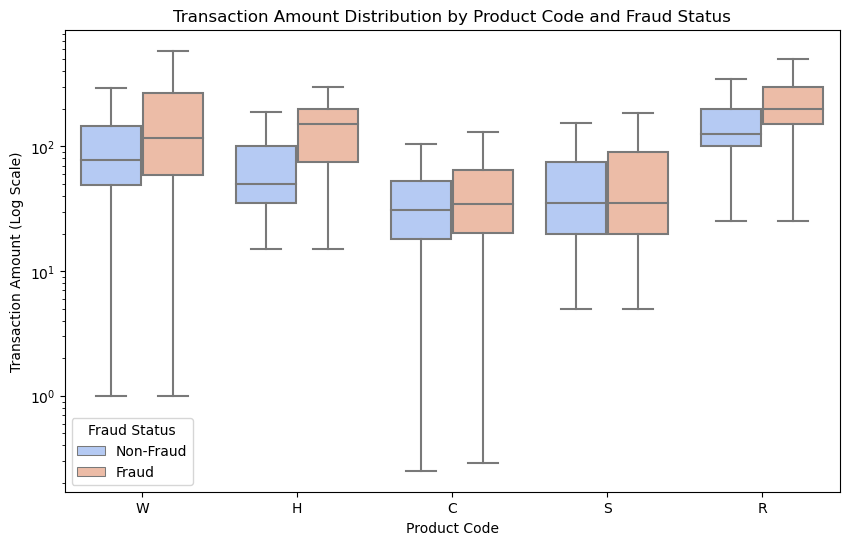

In [55]:
#Below we will utilize the ProductCD: the product code, the product for each transaction

plt.figure(figsize=(10, 6))

ax = sns.boxplot(x='ProductCD', y='TransactionAmt', hue='isFraud', 
                 data=train_transaction, showfliers=False, palette="coolwarm")

# Convert y-axis to log scale and set labels
plt.yscale('log')
plt.title("Transaction Amount Distribution by Product Code and Fraud Status")
plt.xlabel("Product Code")
plt.ylabel("Transaction Amount (Log Scale)")

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ["Non-Fraud", "Fraud"], title="Fraud Status")

plt.show()


In [56]:
train[train['isFraud']==1]['ProductCD'].value_counts(normalize =True)

W    0.434061
C    0.387553
H    0.076175
R    0.069012
S    0.033199
Name: ProductCD, dtype: float64

In [57]:
train.groupby("ProductCD")['isFraud'].value_counts(normalize=True)

ProductCD  isFraud
C          0          0.883127
           1          0.116873
H          0          0.952338
           1          0.047662
R          0          0.962174
           1          0.037826
S          0          0.941004
           1          0.058996
W          0          0.979601
           1          0.020399
Name: isFraud, dtype: float64

Observation: Product C are items with lower dollar value but is the most frequent product category. It also has the highest fraud count (isFraud=1) 0.11. 

Label Encoding (For Ordinal Categories): 
We have some categorical features (such as ProductCD, card4 and card6) into a format suitable for modeling


In [66]:
from sklearn.preprocessing import LabelEncoder

# Define categorical columns
categorical_cols = ['ProductCD', 'card4', 'card6']

# Initialize LabelEncoders for each categorical column
label_encoders = {}

for col in categorical_cols:
    if col in train.columns:
        label_encoders[col] = LabelEncoder()
        train[col] = label_encoders[col].fit_transform(train[col].astype(str))


In [67]:
train = pd.get_dummies(train, columns=['ProductCD', 'card4', 'card6'], drop_first=True)


In [68]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,ProductCD_1,ProductCD_2,ProductCD_3,ProductCD_4,card4_1,card4_2,card4_3,card6_1,card6_2,card6_3
0,2987000,0,86400,68.5,13926,361.0,150.0,142.0,315.0,87.0,...,0,0,0,1,1,0,0,1,0,0
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,...,0,0,0,1,0,1,0,1,0,0
2,2987002,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,...,0,0,0,1,0,0,1,0,1,0
3,2987003,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,...,0,0,0,1,0,1,0,0,1,0
4,2987004,0,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,...,1,0,0,0,0,1,0,1,0,0


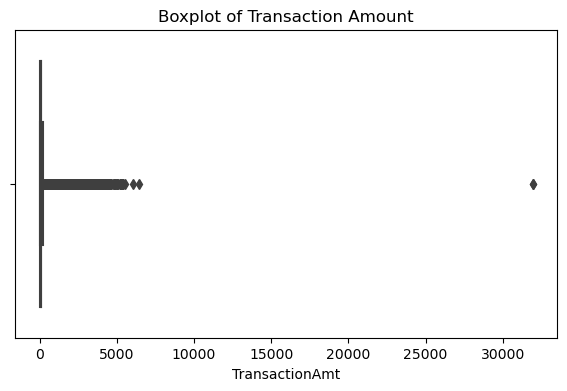

Dataset shape after outlier removal: (590540, 435)


In [12]:
# Boxplot to visualize outliers in TransactionAmt
plt.figure(figsize=(7,4))
sns.boxplot(x=train['TransactionAmt'])
plt.title('Boxplot of Transaction Amount')
plt.show()

# Remove outliers using IQR
Q1 = train['TransactionAmt'].quantile(0.25)
Q3 = train['TransactionAmt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_merged = train[(train['TransactionAmt'] >= lower_bound) & 
                            (train['TransactionAmt'] <= upper_bound)]

print("Dataset shape after outlier removal:", train.shape)


Let's check if there is are there periodic spikes?

In [4]:
df= train

In [5]:
# Convert TransactionDT to datetime
start_date = pd.to_datetime("2017-11-30")
df['TransactionDT'] = pd.to_timedelta(df['TransactionDT'], unit='s') + start_date
df['hour'] = df['TransactionDT'].dt.hour 

# Total transaction amount per hour
hourly = df.groupby('hour').agg(
    total_amt=('TransactionAmt', 'sum'),
    total_count=('TransactionAmt', 'count'),
    fraud_count=('isFraud', 'sum')
).reset_index()

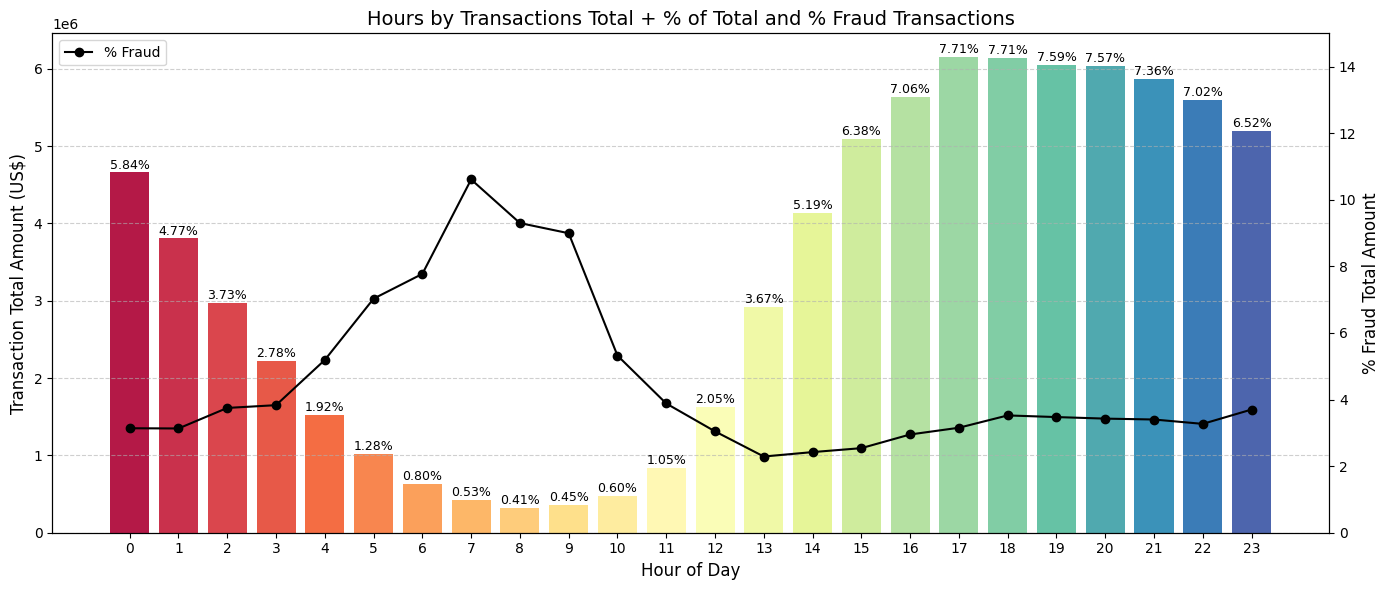

In [6]:
# % of total amount and % of frauds
hourly['%total_amt'] = 100 * hourly['total_amt'] / hourly['total_amt'].sum()
hourly['%fraud'] = 100 * hourly['fraud_count'] / hourly['total_count']

# === Plot === #
fig, ax1 = plt.subplots(figsize=(14, 6))

# Barplot - total transaction amount
colors = sns.color_palette("Spectral", len(hourly))
bars = ax1.bar(hourly['hour'], hourly['total_amt'], color=colors)
ax1.set_ylabel("Transaction Total Amount (US$)", fontsize=12)
ax1.set_xlabel("Hour of Day", fontsize=12)
ax1.set_title("Hours by Transactions Total + % of Total and % Fraud Transactions", fontsize=14)
ax1.tick_params(axis='y')
ax1.set_xticks(hourly['hour'])

# Add %total_amt labels on bars
for idx, row in hourly.iterrows():
    ax1.text(row['hour'], row['total_amt'] + 10000, f"{row['%total_amt']:.2f}%", 
             ha='center', va='bottom', fontsize=9, rotation=0)

# Line plot - % of fraud transactions
ax2 = ax1.twinx()
ax2.plot(hourly['hour'], hourly['%fraud'], color='black', marker='o', label='% Fraud')
ax2.set_ylabel("% Fraud Total Amount", fontsize=12)
ax2.tick_params(axis='y')
ax2.set_ylim(0, max(hourly['%fraud'].max() + 2, 15))  # for spacing

# Grid and legends
ax1.grid(True, axis='y', linestyle='--', alpha=0.6)
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

Based on the above graph, it looks like the transaction amount fraud activity do not correlated with the fraud rate. Meaning, the fraud activity are more of a behaviour and context driven rather than time-specific. Fraudulent transactions cluster around lower amounts but with higher density at a few narrow spikes.

Feature Distributions by Class
Visualize how important numeric features differ between fraud and non-fraud

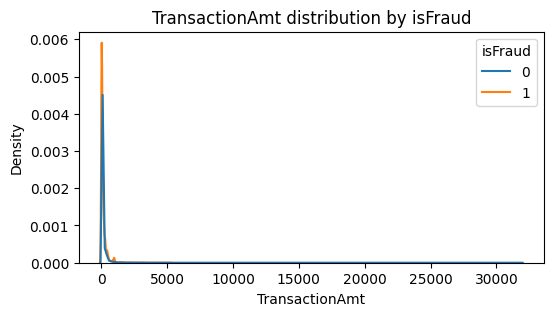

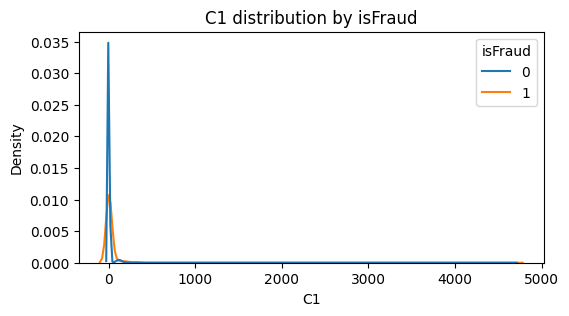

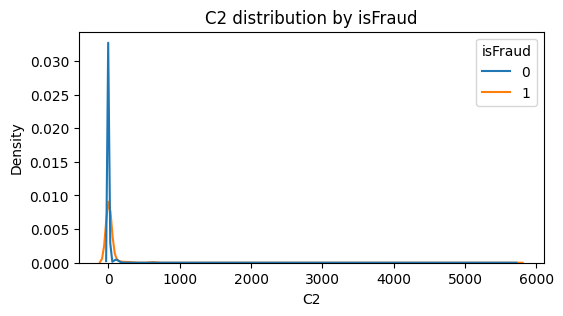

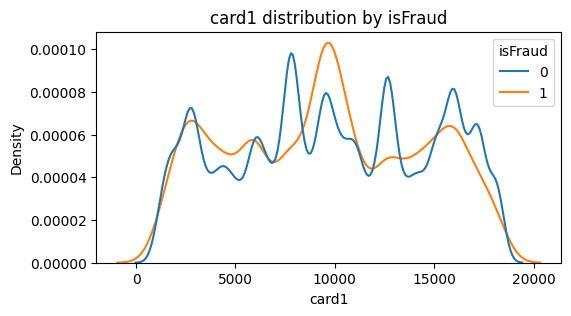

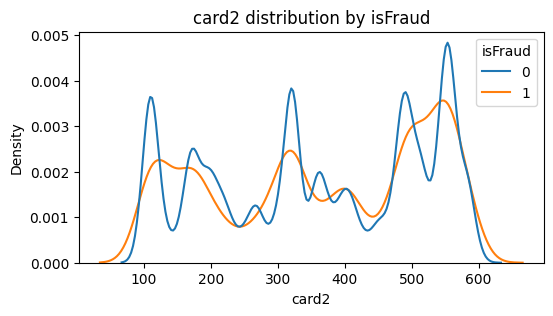

In [11]:
features = ['TransactionAmt', 'C1', 'C2', 'card1', 'card2']
for feature in features:
    plt.figure(figsize=(6,3))
    sns.kdeplot(data=train, x=feature, hue='isFraud', common_norm=False)
    plt.title(f"{feature} distribution by isFraud")
    plt.show()


- C1, C2
Observation: Fraud distributions in these customer count features slightly shift but are mostly overlapping.

- card1, card2
Observation: Distinct fraud density patterns suggest certain cards are more vulnerable.
Good candidates for frequency encoding (i.e., how common a value is).

    Next Step: Create card1_freq = train['card1'].map(train['card1'].value_counts())
Same for card2, then test feature importance.


In [15]:

train['card1_freq'] = train['card1'].map(train['card1'].value_counts())
train['card2_freq'] = train['card2'].map(train['card2'].value_counts())

In [20]:
df[['card1_freq', 'card2_freq']].head()

,card1_freq,card2_freq
0,43,NaN
1,683,3056.0
2,1108,38145.0
3,4209,6137.0
4,18,14541.0


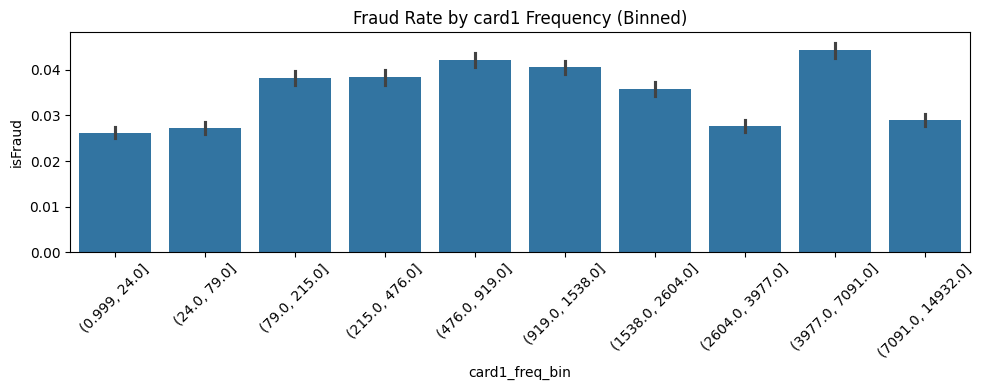

In [21]:
df['card1_freq_bin'] = pd.qcut(df['card1_freq'], q=10, duplicates='drop')

plt.figure(figsize=(10, 4))
sns.barplot(x='card1_freq_bin', y='isFraud', data=df)
plt.xticks(rotation=45)
plt.title("Fraud Rate by card1 Frequency (Binned)")
plt.tight_layout()
plt.show()


This above graph shows: X-axis: card1_freq_bin
- These are quantile bins (equal-sized groups) of card1_freq.
- Each bin groups card1 values by how frequently they appear in the dataset.
- For example:
    - (0.999, 24.0] means the lowest-frequency cards (seen ≤ 24 times)
    - (7091.0, 14932.0] are the highest-frequency cards

Y-axis: isFraud
- This shows the average fraud rate in each frequency group (i.e., the % of transactions labeled as fraud in that bin)

<h4>Interpretation</h4>

Low-Frequency Cards (0.999 – 79)
- Fraud rate is relatively low (~2.6–2.8%)
- These might be newer or rarely used cards, but not inherently high risk in this sample

Medium-Frequency Cards (79 – 2604)
- Fraud rate increases, especially around the (476 – 919) and (919 – 1538) bins.
- Suggests fraudsters may use moderately common cards to blend in

High-Frequency Cards (3977 – 7091)
- Highest fraud rate (~4.5%)
- These cards may be reused fraudulently or reflect shared credentials

Very High Frequency (7091 – 14932)
- Surprisingly, fraud rate drops again — possibly due to these being trusted customers or institutional cards with lots of legit activity.

- There’s a non-linear relationship between card frequency and fraud.
- Medium to high frequency cards can be riskier.
- Including card1_freq in our model helps it learn patterns we can't capture with raw card1

<h4>Categorical Fraud Rates (Barplots)</h4>
For features like ProductCD, card4, card6:

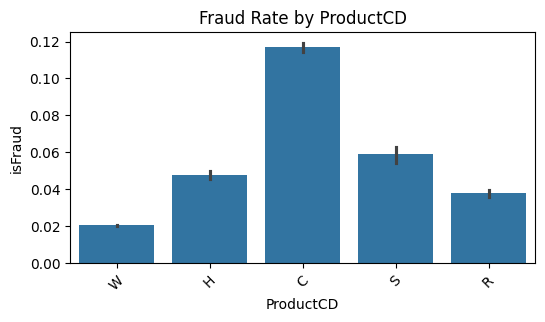

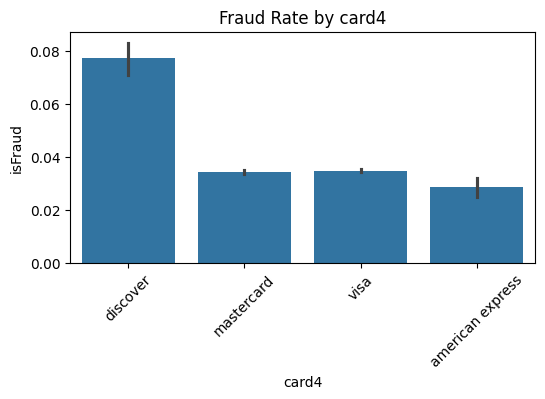

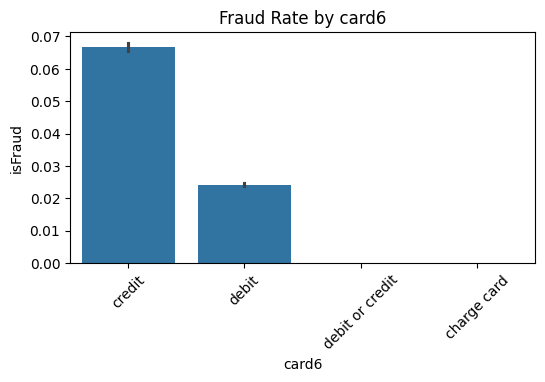

In [12]:
categoricals = ['ProductCD', 'card4', 'card6']
for cat in categoricals:
    plt.figure(figsize=(6,3))
    sns.barplot(x=cat, y='isFraud', data=train)
    plt.title(f"Fraud Rate by {cat}")
    plt.xticks(rotation=45)
    plt.show()



<h5>ProductCD vs isFraud</h5>
Observation:
- Product type 'C' shows the highest fraud rate (~12%).
- 'W' and 'R' have lower fraud rates (~2–4%).

<h5>card4 (Card Type)</h5>
Observation:
- 'discover' has the highest fraud rate (~8%).
- 'mastercard' and 'visa' are more common but show lower fraud.

<h5>card6 (Card Usage Type)</h5>
Observation:
- 'credit' cards show higher fraud rates (~6.5%) than 'debit'.



<h3>Estimate U.S. vs. Non-U.S. Transactions</h3>

We want to check geolocation-based features as it can be quite predictive in fraud detection!

However, the IEEE-CIS dataset does not include a direct “country” or “location” field. But we can infer U.S. vs. non-U.S. transactions using a few ways:

In [24]:
# we will use addr1 and addr2 (Postal Address). addr1 ≈ ZIP prefix (first 2–3 digits of ZIP codes)
# U.S. ZIP codes fall within a known range: addr1 in 100–999 is a decent proxy for U.S.

df['is_US'] = df['addr1'].between(100, 999)


In [25]:
us_domains = ['gmail.com', 'yahoo.com', 'hotmail.com', 'aol.com', 'outlook.com', 'mail.com']
df['P_emaildomain_us'] = df['P_emaildomain'].isin(us_domains)
df['R_emaildomain_us'] = df['R_emaildomain'].isin(us_domains)


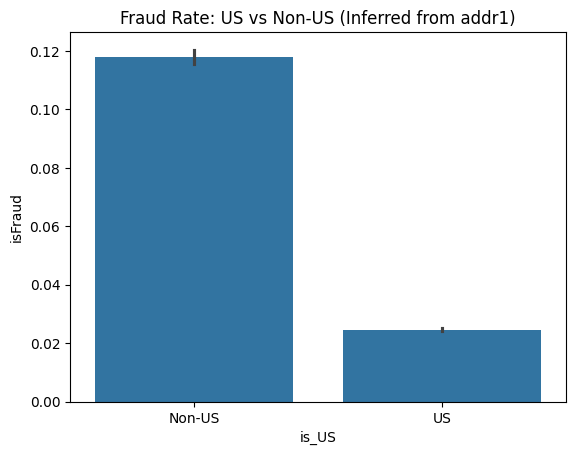

In [26]:
# Using addr1 as proxy
df['is_US'] = df['addr1'].between(100, 999)

# Visualize fraud rate
sns.barplot(x='is_US', y='isFraud', data=df)
plt.xticks([0, 1], ['Non-US', 'US'])
plt.title('Fraud Rate: US vs Non-US (Inferred from addr1)')
plt.show()


In [27]:
df['P_emaildomain'].unique()


array([nan, 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

In [28]:
df['R_emaildomain'].unique()

array([nan, 'gmail.com', 'hotmail.com', 'outlook.com', 'anonymous.com',
       'charter.net', 'prodigy.net.mx', 'comcast.net', 'live.com.mx',
       'icloud.com', 'yahoo.com', 'aol.com', 'juno.com', 'att.net',
       'verizon.net', 'yahoo.com.mx', 'bellsouth.net', 'servicios-ta.com',
       'ymail.com', 'hotmail.es', 'msn.com', 'optonline.net', 'live.com',
       'gmx.de', 'aim.com', 'mail.com', 'me.com', 'outlook.es', 'cox.net',
       'earthlink.net', 'embarqmail.com', 'web.de', 'sbcglobal.net',
       'scranton.edu', 'mac.com', 'twc.com', 'roadrunner.com', 'yahoo.fr',
       'yahoo.de', 'yahoo.es', 'frontiernet.net', 'gmail', 'live.fr',
       'q.com', 'yahoo.co.uk', 'windstream.net', 'suddenlink.net',
       'hotmail.fr', 'ptd.net', 'hotmail.de', 'frontier.com',
       'cfl.rr.com', 'hotmail.co.uk', 'netzero.com', 'netzero.net',
       'yahoo.co.jp', 'rocketmail.com', 'centurylink.net',
       'protonmail.com', 'cableone.net', 'sc.rr.com'], dtype=object)

/var/folders/hc/h8vmkcps571_4k1v0_h55fsw0000gn/T/ipykernel_1032/926235791.py:11: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/nbakhati/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


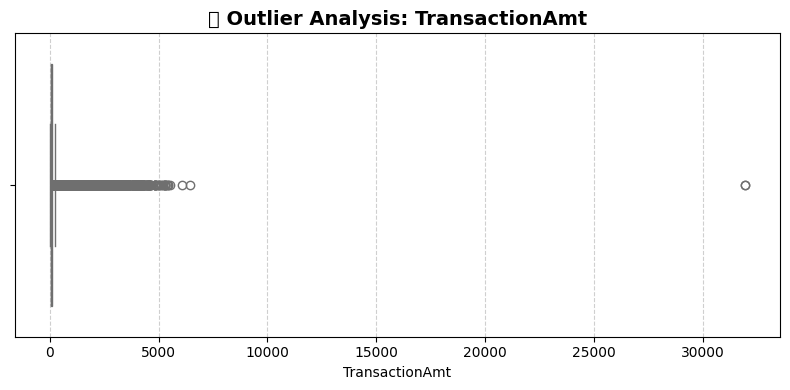

/var/folders/hc/h8vmkcps571_4k1v0_h55fsw0000gn/T/ipykernel_1032/926235791.py:11: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/nbakhati/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


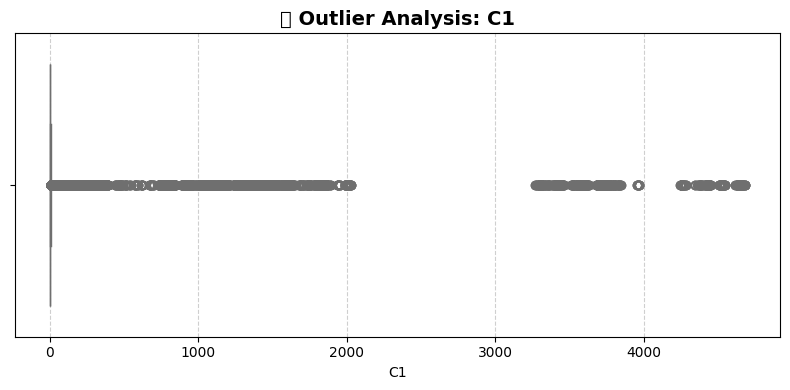

/var/folders/hc/h8vmkcps571_4k1v0_h55fsw0000gn/T/ipykernel_1032/926235791.py:11: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/nbakhati/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


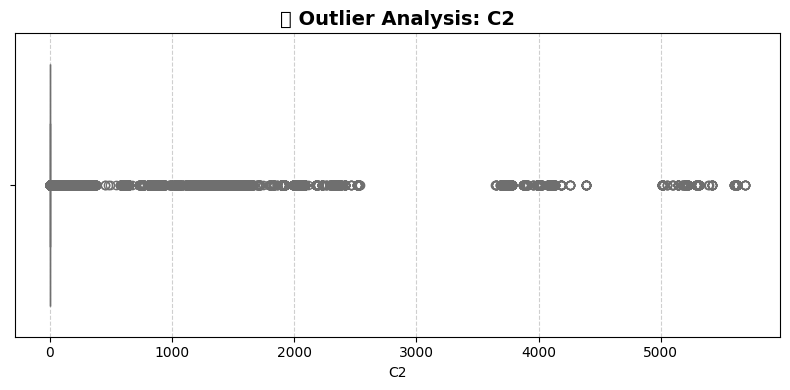

/var/folders/hc/h8vmkcps571_4k1v0_h55fsw0000gn/T/ipykernel_1032/926235791.py:11: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/nbakhati/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


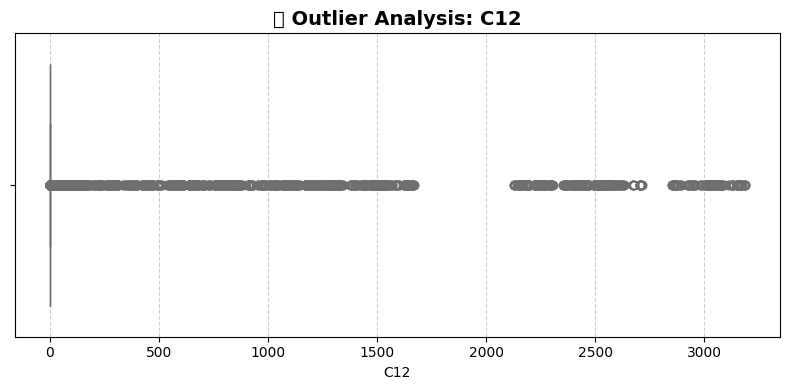

In [4]:
# List of key numeric features
features = ['TransactionAmt', 'C1', 'C2', 'C12']

# Plot each feature as a boxplot
for col in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train[col], color='skyblue')
    plt.title(f"🔍 Outlier Analysis: {col}", fontsize=14, weight='bold')
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

/var/folders/hc/h8vmkcps571_4k1v0_h55fsw0000gn/T/ipykernel_1032/1902716478.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud_str', y=col, data=train, palette={'0': 'lightgreen', '1': 'salmon'})


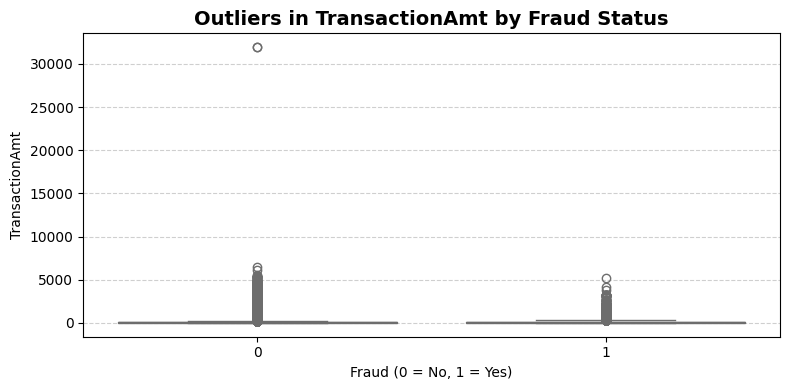

/var/folders/hc/h8vmkcps571_4k1v0_h55fsw0000gn/T/ipykernel_1032/1902716478.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud_str', y=col, data=train, palette={'0': 'lightgreen', '1': 'salmon'})


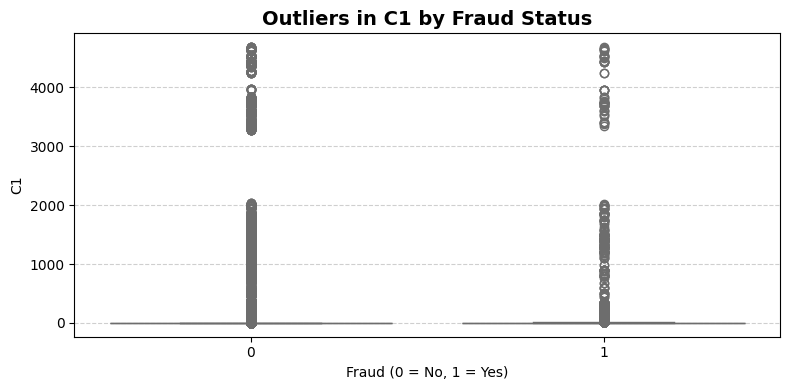

/var/folders/hc/h8vmkcps571_4k1v0_h55fsw0000gn/T/ipykernel_1032/1902716478.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud_str', y=col, data=train, palette={'0': 'lightgreen', '1': 'salmon'})


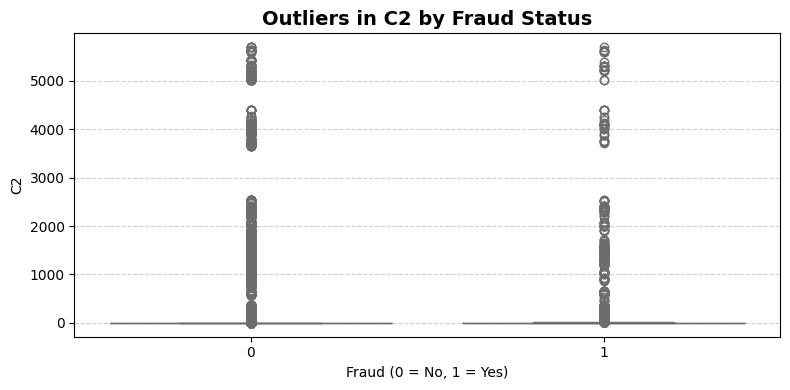

/var/folders/hc/h8vmkcps571_4k1v0_h55fsw0000gn/T/ipykernel_1032/1902716478.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud_str', y=col, data=train, palette={'0': 'lightgreen', '1': 'salmon'})


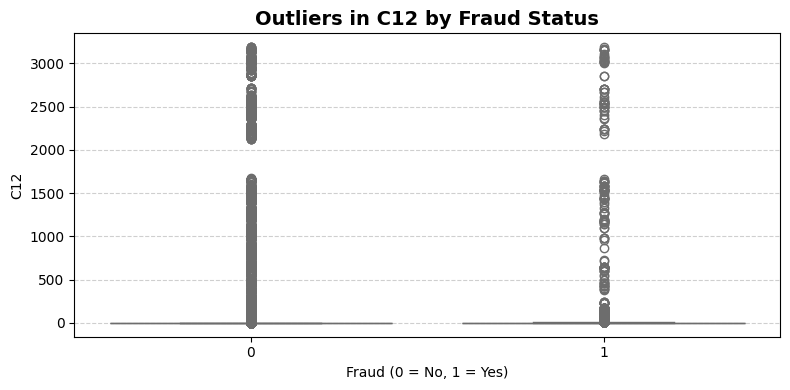

In [5]:
# Convert isFraud to string for consistent matching with palette
train['isFraud_str'] = train['isFraud'].astype(str)

for col in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='isFraud_str', y=col, data=train, palette={'0': 'lightgreen', '1': 'salmon'})
    plt.title(f"Outliers in {col} by Fraud Status", fontsize=14, weight='bold')
    plt.xlabel("Fraud (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [7]:
# Store results
outlier_comparison = []

for col in features:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Total cases
    total_fraud = train[train['isFraud'] == 1].shape[0]
    total_nonfraud = train[train['isFraud'] == 0].shape[0]

    # Outliers by group
    fraud_outliers = train[
        (train['isFraud'] == 1) &
        ((train[col] < lower) | (train[col] > upper))
    ].shape[0]

    nonfraud_outliers = train[
        (train['isFraud'] == 0) &
        ((train[col] < lower) | (train[col] > upper))
    ].shape[0]

    # Append result
    outlier_comparison.append({
        'Feature': col,
        'Fraud Outliers (%)': round(fraud_outliers / total_fraud * 100, 2),
        'Non-Fraud Outliers (%)': round(nonfraud_outliers / total_nonfraud * 100, 2),
        'Fraud Outliers Count': fraud_outliers,
        'Non-Fraud Outliers Count': nonfraud_outliers
    })

# Display as DataFrame
df_outlier_comparison = pd.DataFrame(outlier_comparison)
print("\n📊 Fraud vs. Non-Fraud Outlier Rates (IQR Method):\n")
print(df_outlier_comparison.to_string(index=False))


📊 Fraud vs. Non-Fraud Outlier Rates (IQR Method):

       Feature  Fraud Outliers (%)  Non-Fraud Outliers (%)  Fraud Outliers Count  Non-Fraud Outliers Count
TransactionAmt               16.32                   11.07                  3372                     63110
            C1               24.56                    9.56                  5075                     54460
            C2               25.89                    9.98                  5350                     56864
           C12               45.79                   16.12                  9462                     91879


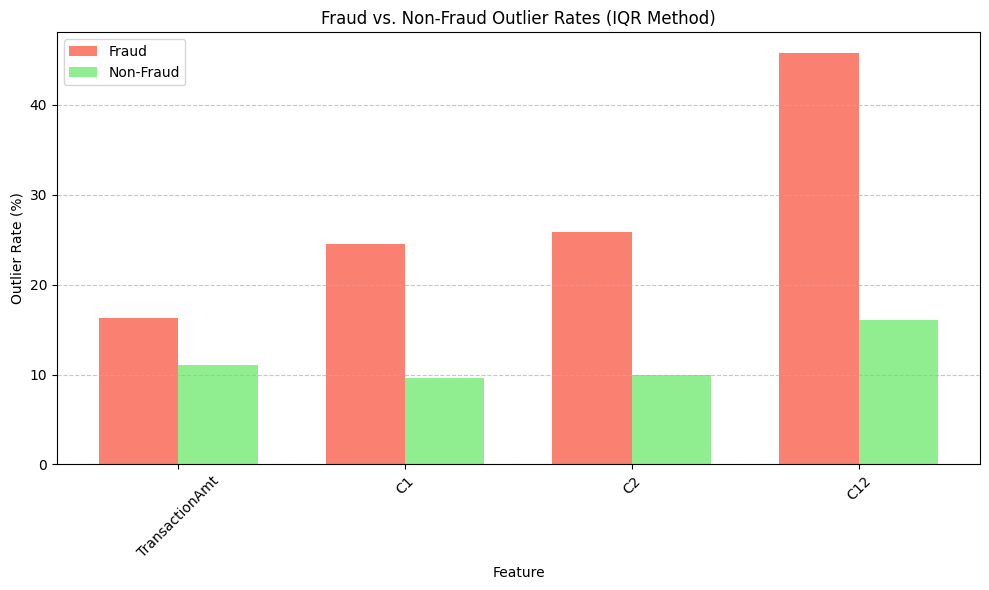

In [8]:
# Extract values
features = df_outlier_comparison['Feature']
fraud_rates = df_outlier_comparison['Fraud Outliers (%)']
nonfraud_rates = df_outlier_comparison['Non-Fraud Outliers (%)']

x = np.arange(len(features))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, fraud_rates, width, label='Fraud', color='salmon')
plt.bar(x + width/2, nonfraud_rates, width, label='Non-Fraud', color='lightgreen')

plt.xlabel('Feature')
plt.ylabel('Outlier Rate (%)')
plt.title('Fraud vs. Non-Fraud Outlier Rates (IQR Method)')
plt.xticks(ticks=x, labels=features, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
# Get all V-feature columns
v_features = [col for col in train.columns if col.startswith('V')]

# Store results
v_outlier_comparison = []

for col in v_features:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    total_fraud = train[train['isFraud'] == 1].shape[0]
    total_nonfraud = train[train['isFraud'] == 0].shape[0]

    fraud_outliers = train[
        (train['isFraud'] == 1) &
        ((train[col] < lower) | (train[col] > upper))
    ].shape[0]

    nonfraud_outliers = train[
        (train['isFraud'] == 0) &
        ((train[col] < lower) | (train[col] > upper))
    ].shape[0]

    v_outlier_comparison.append({
        'Feature': col,
        'Fraud Outliers (%)': round(fraud_outliers / total_fraud * 100, 2),
        'Non-Fraud Outliers (%)': round(nonfraud_outliers / total_nonfraud * 100, 2),
        'Fraud Outliers Count': fraud_outliers,
        'Non-Fraud Outliers Count': nonfraud_outliers
    })

# Create a DataFrame and sort by highest fraud outlier rate
v_outlier_df = pd.DataFrame(v_outlier_comparison)
v_outlier_df = v_outlier_df.sort_values(by='Fraud Outliers (%)', ascending=False)

# Display top 10
print("\n Top 10 V-Features with Highest Fraud Outlier Rates:\n")
print(v_outlier_df.head(10).to_string(index=False))



📊 Top 10 V-Features with Highest Fraud Outlier Rates:

Feature  Fraud Outliers (%)  Non-Fraud Outliers (%)  Fraud Outliers Count  Non-Fraud Outliers Count
   V303               54.33                   22.78                 11226                    129803
   V304               54.12                   22.73                 11183                    129515
   V302               53.88                   22.67                 11133                    129204
   V222               40.09                    9.26                  8283                     52799
    V94               38.82                   10.65                  8021                     60667
    V34               38.79                   10.96                  8016                     62462
    V52               38.31                   10.95                  7917                     62417
    V51               37.70                   10.57                  7790                     60259
    V33               37.63                 

This outlier analysis reveals that certain V-features (especially V303, V304, V302, and several others) show a strong statistical separation between fraud and non-fraud transactions. A significant percentage of fraudulent transactions appear as outliers on these features, while non-fraudulent transactions generally fall within the normal range.

This pattern suggests that these V-features carry distinct fraud signals and can be valuable predictors in fraud detection models.

In [11]:
# Select only numeric columns first
numeric_cols = train.select_dtypes(include=['number'])

# Now safely calculate correlation
corr_with_fraud = numeric_cols.corr()['isFraud'].sort_values(ascending=False)

# Filter top 15 features (excluding 'isFraud' itself)
top_corr_features = corr_with_fraud.drop('isFraud').head(30).index.tolist()
print("Top 30 numeric features most correlated with fraud:\n", top_corr_features)


Top 30 numeric features most correlated with fraud:
 ['V257', 'V246', 'V244', 'V242', 'V201', 'V200', 'V189', 'V188', 'V258', 'V45', 'V158', 'V156', 'V149', 'V228', 'V44', 'V86', 'V87', 'V170', 'V147', 'V52', 'V157', 'V155', 'V230', 'V199', 'V148', 'V51', 'V171', 'V40', 'V243', 'V154']


In [14]:
# List of top correlated features you haven't analyzed yet
important_features = [
    'V257', 'V246', 'V244', 'V242', 'V201', 'V200', 
    'V189', 'V188', 'V258', 'V45', 'V158', 'V156', 'V149', 
    'V228', 'V44', 'V86', 'V87', 'V170', 'V147', 'V52', 'V157', 
    'V155', 'V230', 'V199', 'V148', 'V51', 'V171', 'V40', 'V243', 'V154'
]

# Initialize list to store results
iqr_results = []

# IQR Analysis loop
for col in important_features:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    total_fraud = train[train['isFraud'] == 1].shape[0]
    total_nonfraud = train[train['isFraud'] == 0].shape[0]

    fraud_outliers = train[
        (train['isFraud'] == 1) &
        ((train[col] < lower) | (train[col] > upper))
    ].shape[0]

    nonfraud_outliers = train[
        (train['isFraud'] == 0) &
        ((train[col] < lower) | (train[col] > upper))
    ].shape[0]

    iqr_results.append({
        'Feature': col,
        'Fraud Outliers (%)': round(fraud_outliers / total_fraud * 100, 2),
        'Non-Fraud Outliers (%)': round(nonfraud_outliers / total_nonfraud * 100, 2),
        'Fraud Outlier Count': fraud_outliers,
        'Non-Fraud Outlier Count': nonfraud_outliers
    })

# Convert to DataFrame
iqr_df = pd.DataFrame(iqr_results)

# Sort by descending Fraud Outliers %
iqr_df = iqr_df.sort_values(by='Fraud Outliers (%)', ascending=False)

# Display the Top 10
print("\n Top 10 Features by Fraud Outlier Rate (IQR Method):\n")
print(iqr_df.head(10).to_string(index=False))


 Top 10 Features by Fraud Outlier Rate (IQR Method):

Feature  Fraud Outliers (%)  Non-Fraud Outliers (%)  Fraud Outlier Count  Non-Fraud Outlier Count
    V52               38.31                   10.95                 7917                    62417
    V51               37.70                   10.57                 7790                    60259
    V40               35.34                    9.90                 7302                    56432
   V171               32.12                    6.38                 6637                    36364
   V170               30.01                    5.63                 6201                    32109
   V258               27.62                    2.07                 5708                    11769
   V201               27.06                    3.13                 5591                    17816
   V230               25.97                    3.02                 5366                    17215
   V200               25.52                    2.95            

Fraudulent transactions consistently show a higher percentage of outliers compared to non-fraud across key features:

V52, and V51 show outlier rates near 38% for fraud, but only ~11% for non-fraud, indicating clear separation.

 These features are highly valuable for fraud detection, as fraud tends to behave abnormally in these areas.

In [4]:
import pandas as pd
df=pd.read_csv('/Users/nbakhati/Library/CloudStorage/OneDrive-UniversityofNebraskaatOmaha/Fraud Detection/Code/train_id&T.csv')

In [5]:
#these are the U.S based common providers
us_domains = [
    'gmail.com', 'yahoo.com', 'hotmail.com', 'aol.com', 'outlook.com', 'mail.com',
    'comcast.net', 'att.net', 'verizon.net', 'icloud.com', 'live.com', 'ymail.com',
    'msn.com', 'sbcglobal.net', 'bellsouth.net', 'me.com', 'optonline.net',
    'cox.net', 'charter.net', 'rocketmail.com'
]


Non-US or localized domains

- prodigy.net.mx, yahoo.com.mx, live.com.mx → Mexico
- hotmail.es, outlook.es, yahoo.es → Spain
- web.de, gmx.de, yahoo.de, hotmail.de → Germany
- yahoo.co.uk, hotmail.co.uk → UK
- yahoo.co.jp → Japan
- protonmail.com → Switzerland (privacy-focused)
- anonymous.com, gmail (no .com) → suspicious / invalid

In [6]:
# Create New Features
# Email domain type
def map_email_type(domain):
    if pd.isna(domain):
        return 'missing'
    elif domain in us_domains:
        return 'us'
    elif '.mx' in domain:
        return 'mx'
    elif '.es' in domain:
        return 'es'
    elif '.de' in domain:
        return 'de'
    elif '.co.uk' in domain:
        return 'uk'
    elif '.co.jp' in domain:
        return 'jp'
    elif 'protonmail' in domain:
        return 'private'
    elif domain in ['anonymous.com', 'gmail']:  # missing .com
        return 'suspicious'
    else:
        return 'other'

df['P_email_cat'] = df['P_emaildomain'].apply(map_email_type)
df['R_email_cat'] = df['R_emaildomain'].apply(map_email_type)


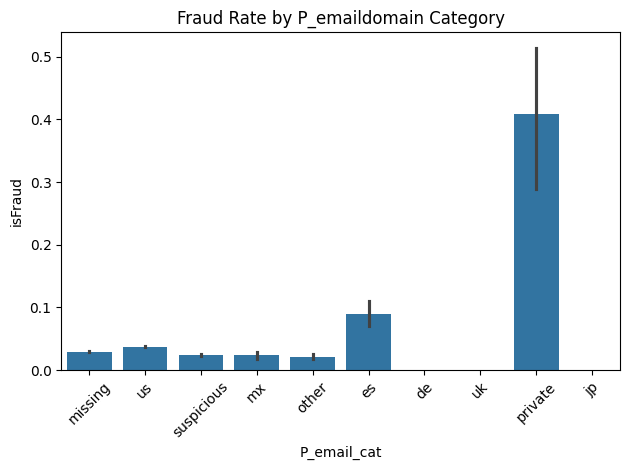

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

#Explore Fraud Rate by Email Type
sns.barplot(x='P_email_cat', y='isFraud', data=df)
plt.title("Fraud Rate by P_emaildomain Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


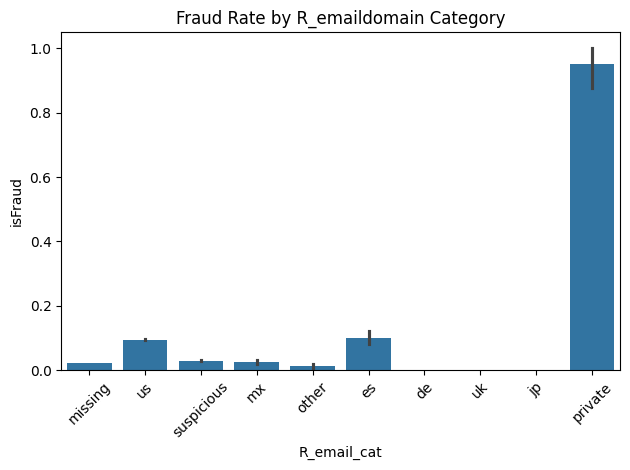

In [17]:
#Explore Fraud Rate by Email Type
sns.barplot(x='R_email_cat', y='isFraud', data=df)
plt.title("Fraud Rate by R_emaildomain Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
df['id_30'].value_counts(dropna=False).head(10)
df.groupby('id_30')['isFraud'].mean().sort_values(ascending=False).head(10)



id_30
other            0.600000
Android 5.1.1    0.288571
Android 4.4.2    0.253968
iOS 11.4.0       0.200000
iOS 11.0.1       0.196850
iOS 11.1.0       0.177122
iOS 11.2.5       0.121667
Android 7.1.2    0.121212
iOS 11.2.2       0.117517
Windows 8        0.116667
Name: isFraud, dtype: float64

In [20]:
df['id_31'].value_counts(dropna=False).head(10)
df.groupby('id_31')['isFraud'].mean().sort_values(ascending=False).head(10)



id_31
Mozilla/Firefox            1.000000
icedragon                  1.000000
comodo                     0.666667
Lanix/Ilium                0.666667
chrome 49.0 for android    0.547170
opera                      0.481928
opera generic              0.448718
chrome 52.0 for android    0.381579
opera 49.0                 0.311594
samsung browser 5.4        0.302326
Name: isFraud, dtype: float64

In [19]:
df['DeviceInfo'].value_counts(dropna=False).head(10)
df.groupby('DeviceInfo')['isFraud'].mean().sort_values(ascending=False).head(10)

DeviceInfo
ZTE-Z835                       1.0
Dream                          1.0
SM-T285M                       1.0
A5002                          1.0
A466BG                         1.0
SM-T530                        1.0
Blade L3 Build/KOT49H          1.0
RNE-L23 Build/HUAWEIRNE-L23    1.0
SAMSUNG-SM-N900A               1.0
MotoG3-TE Build/MPD24.65-33    1.0
Name: isFraud, dtype: float64

Scaling Numerical Features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_features = ['TransactionAmt', 'TransactionAmt_log', 'TransactionHour']

train[num_features] = scaler.fit_transform(train[num_features])


In [29]:
(np.sum(pd.isnull(train)).sort_values(ascending=False)/len(train))*100

id_24             99.196159
id_25             99.130965
id_08             99.127070
id_07             99.127070
id_21             99.126393
                    ...    
C10                0.000000
C11                0.000000
C12                0.000000
C13                0.000000
is_outlier_IQR     0.000000
Length: 435, dtype: float64

Feature Importance Analysis
Check which features best differentiate fraud vs. non-fraud using correlation or feature importance from a simple model.

Since we have class imbalance in the datasets, we will utilize resampling techniques to balance the datasets, we can either :
- Oversample the minority class (isFraud=1)
- Undersample the majority class (isFraud=0)